# Upgrading Scikit Learn Library

In [ ]:
!pip install scikit-learn==1.4.2

# Importing Dependencies & Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection

In [ ]:
 # loading the heart disease dataset to a pandas dataFrame
heart_data = pd.read_csv('/content/heart.csv')

# Exploratory Data Analysis

In [ ]:
# first 5 rows in the dataset
heart_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [ ]:
# last 5 rows in the dataset
heart_data.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [ ]:
# number of rows & columns
heart_data.shape

(1025, 14)

1 = Defective Heart

0 = Normal Heart

In [ ]:
# getting info about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# checking null values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# getting the stats about dataset
heart_data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [ ]:
# number of labels
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
# stastical data according to labels
heart_data.groupby('target').mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.569138  0.827655  0.482966  134.106212  251.292585  0.164329   
1       52.408745  0.570342  1.378327  129.245247  240.979087  0.134981   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.456914  139.130261  0.549098  1.600200  1.166333  1.158317  2.539078  
1       0.598859  158.585551  0.134981  0.569962  1.593156  0.370722  2.119772

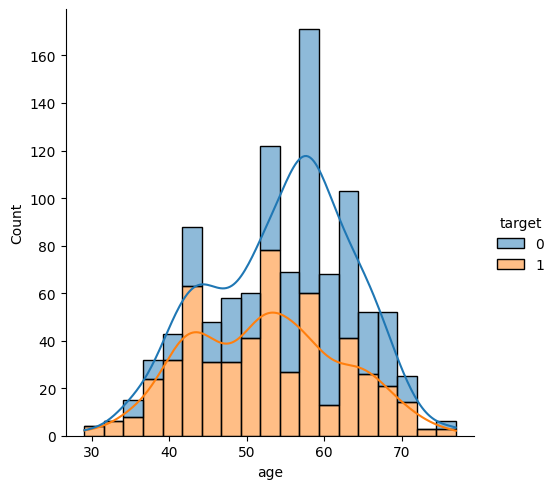

In [ ]:
# distribution plot for age
sns.displot(data=heart_data, x = 'age', kde=True,
           hue='target', multiple='stack')

<Axes: xlabel='sex', ylabel='count'>

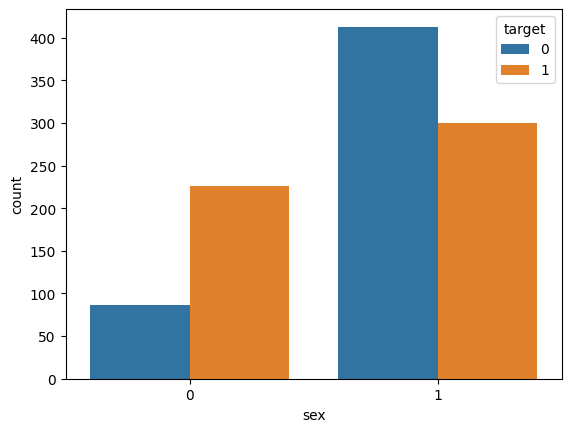

In [ ]:
#count plot for sex
sns.countplot(x='sex',data=heart_data,hue='target')

<Axes: xlabel='cp', ylabel='count'>

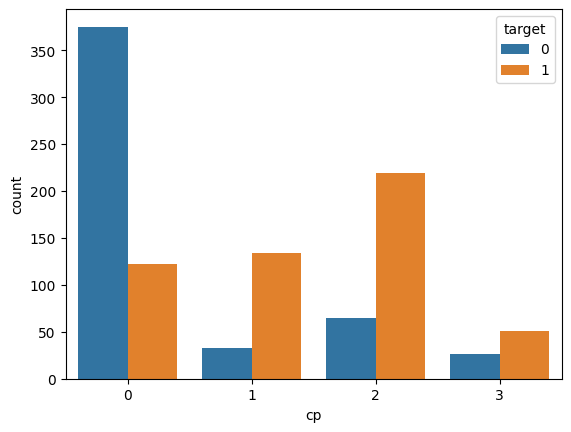

In [ ]:
#count plot for cp
sns.countplot(x='cp',data=heart_data,hue='target')

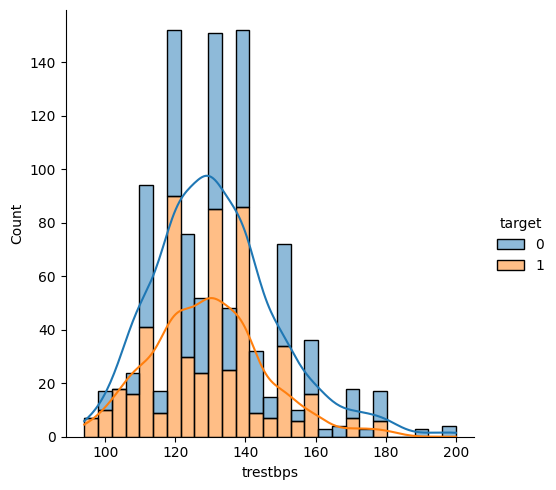

In [ ]:
# distribution plot for trestbps
sns.displot(data=heart_data, x = 'trestbps', kde=True,
           hue='target', multiple='stack')

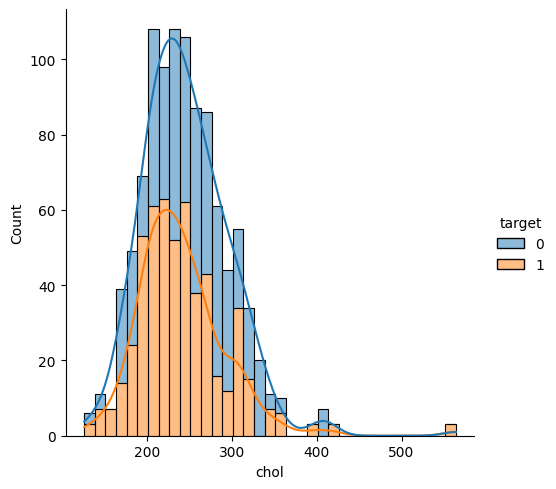

In [ ]:
# distribution plot for chol
sns.displot(data=heart_data, x = 'chol', kde=True,
           hue='target', multiple='stack')

<Axes: xlabel='fbs', ylabel='count'>

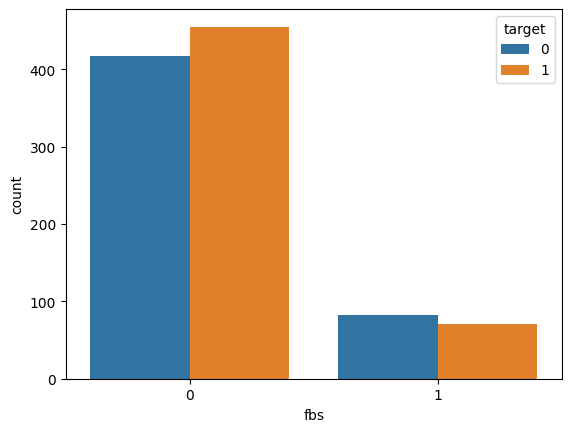

In [ ]:
#count plot for fbs
sns.countplot(x='fbs',data=heart_data,hue='target')

<Axes: xlabel='restecg', ylabel='count'>

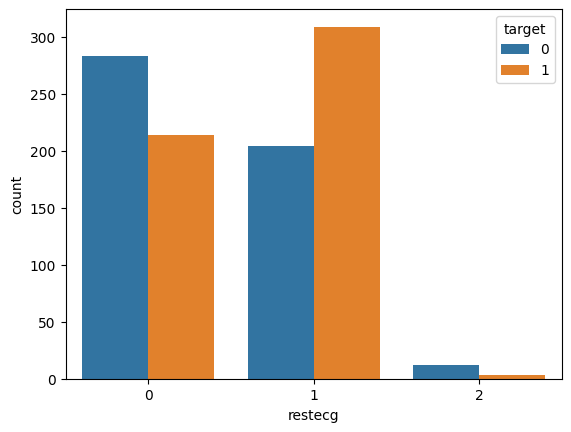

In [ ]:
#count plot for restecg
sns.countplot(x='restecg',data=heart_data,hue='target')

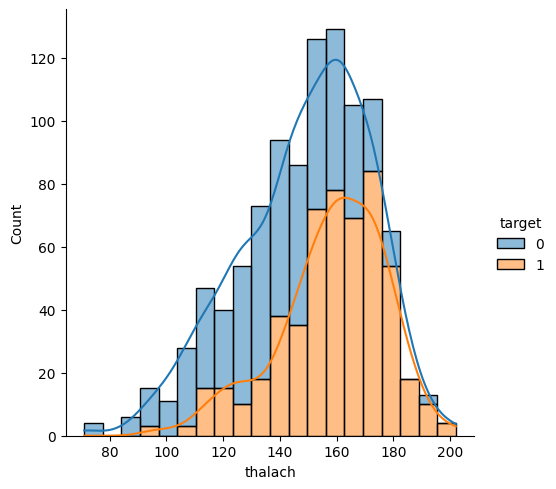

In [ ]:
# distribution plot for thalach
sns.displot(data=heart_data, x = 'thalach', kde=True,
           hue='target', multiple='stack')

<Axes: xlabel='exang', ylabel='count'>

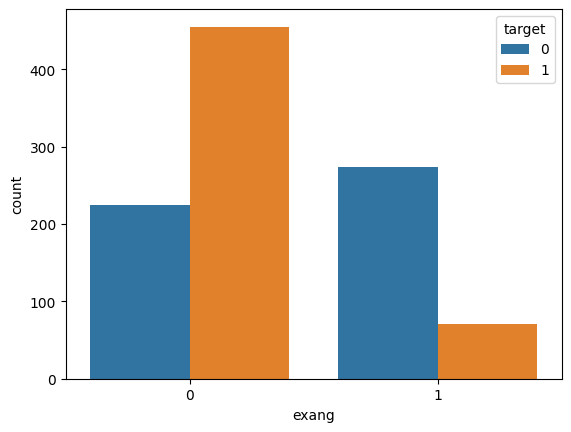

In [ ]:
#count plot for exang
sns.countplot(x='exang',data=heart_data,hue='target')

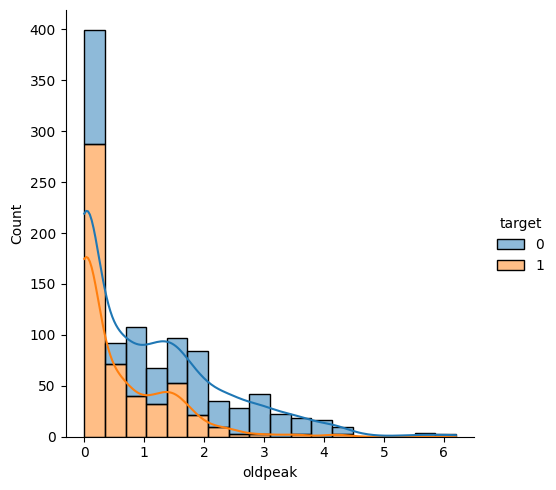

In [ ]:
# distribution plot for oldpeak
sns.displot(data=heart_data, x = 'oldpeak', kde=True,
           hue='target', multiple='stack')

<Axes: xlabel='slope', ylabel='count'>

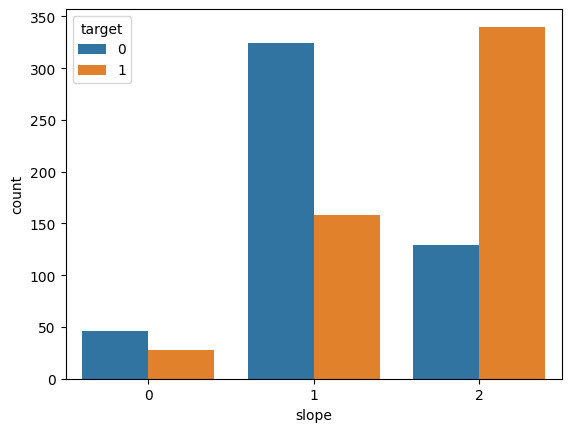

In [ ]:
#count plot for slope
sns.countplot(x='slope',data=heart_data,hue='target')

<Axes: xlabel='ca', ylabel='count'>

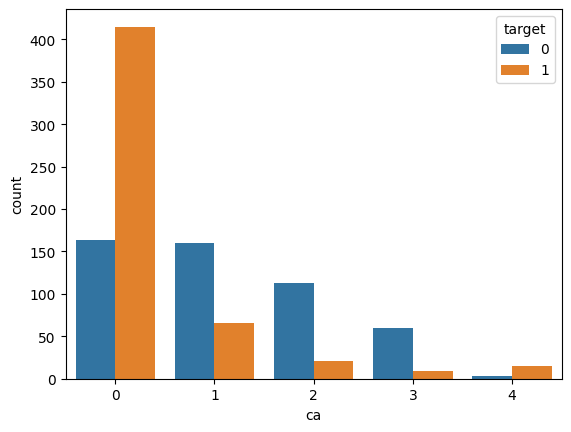

In [ ]:
#count plot for ca
sns.countplot(x='ca',data=heart_data,hue='target')

<Axes: xlabel='thal', ylabel='count'>

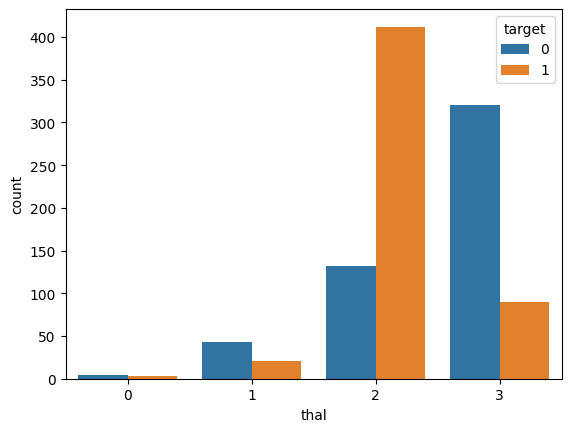

In [ ]:
#count plot for thal
sns.countplot(x='thal',data=heart_data,hue='target')

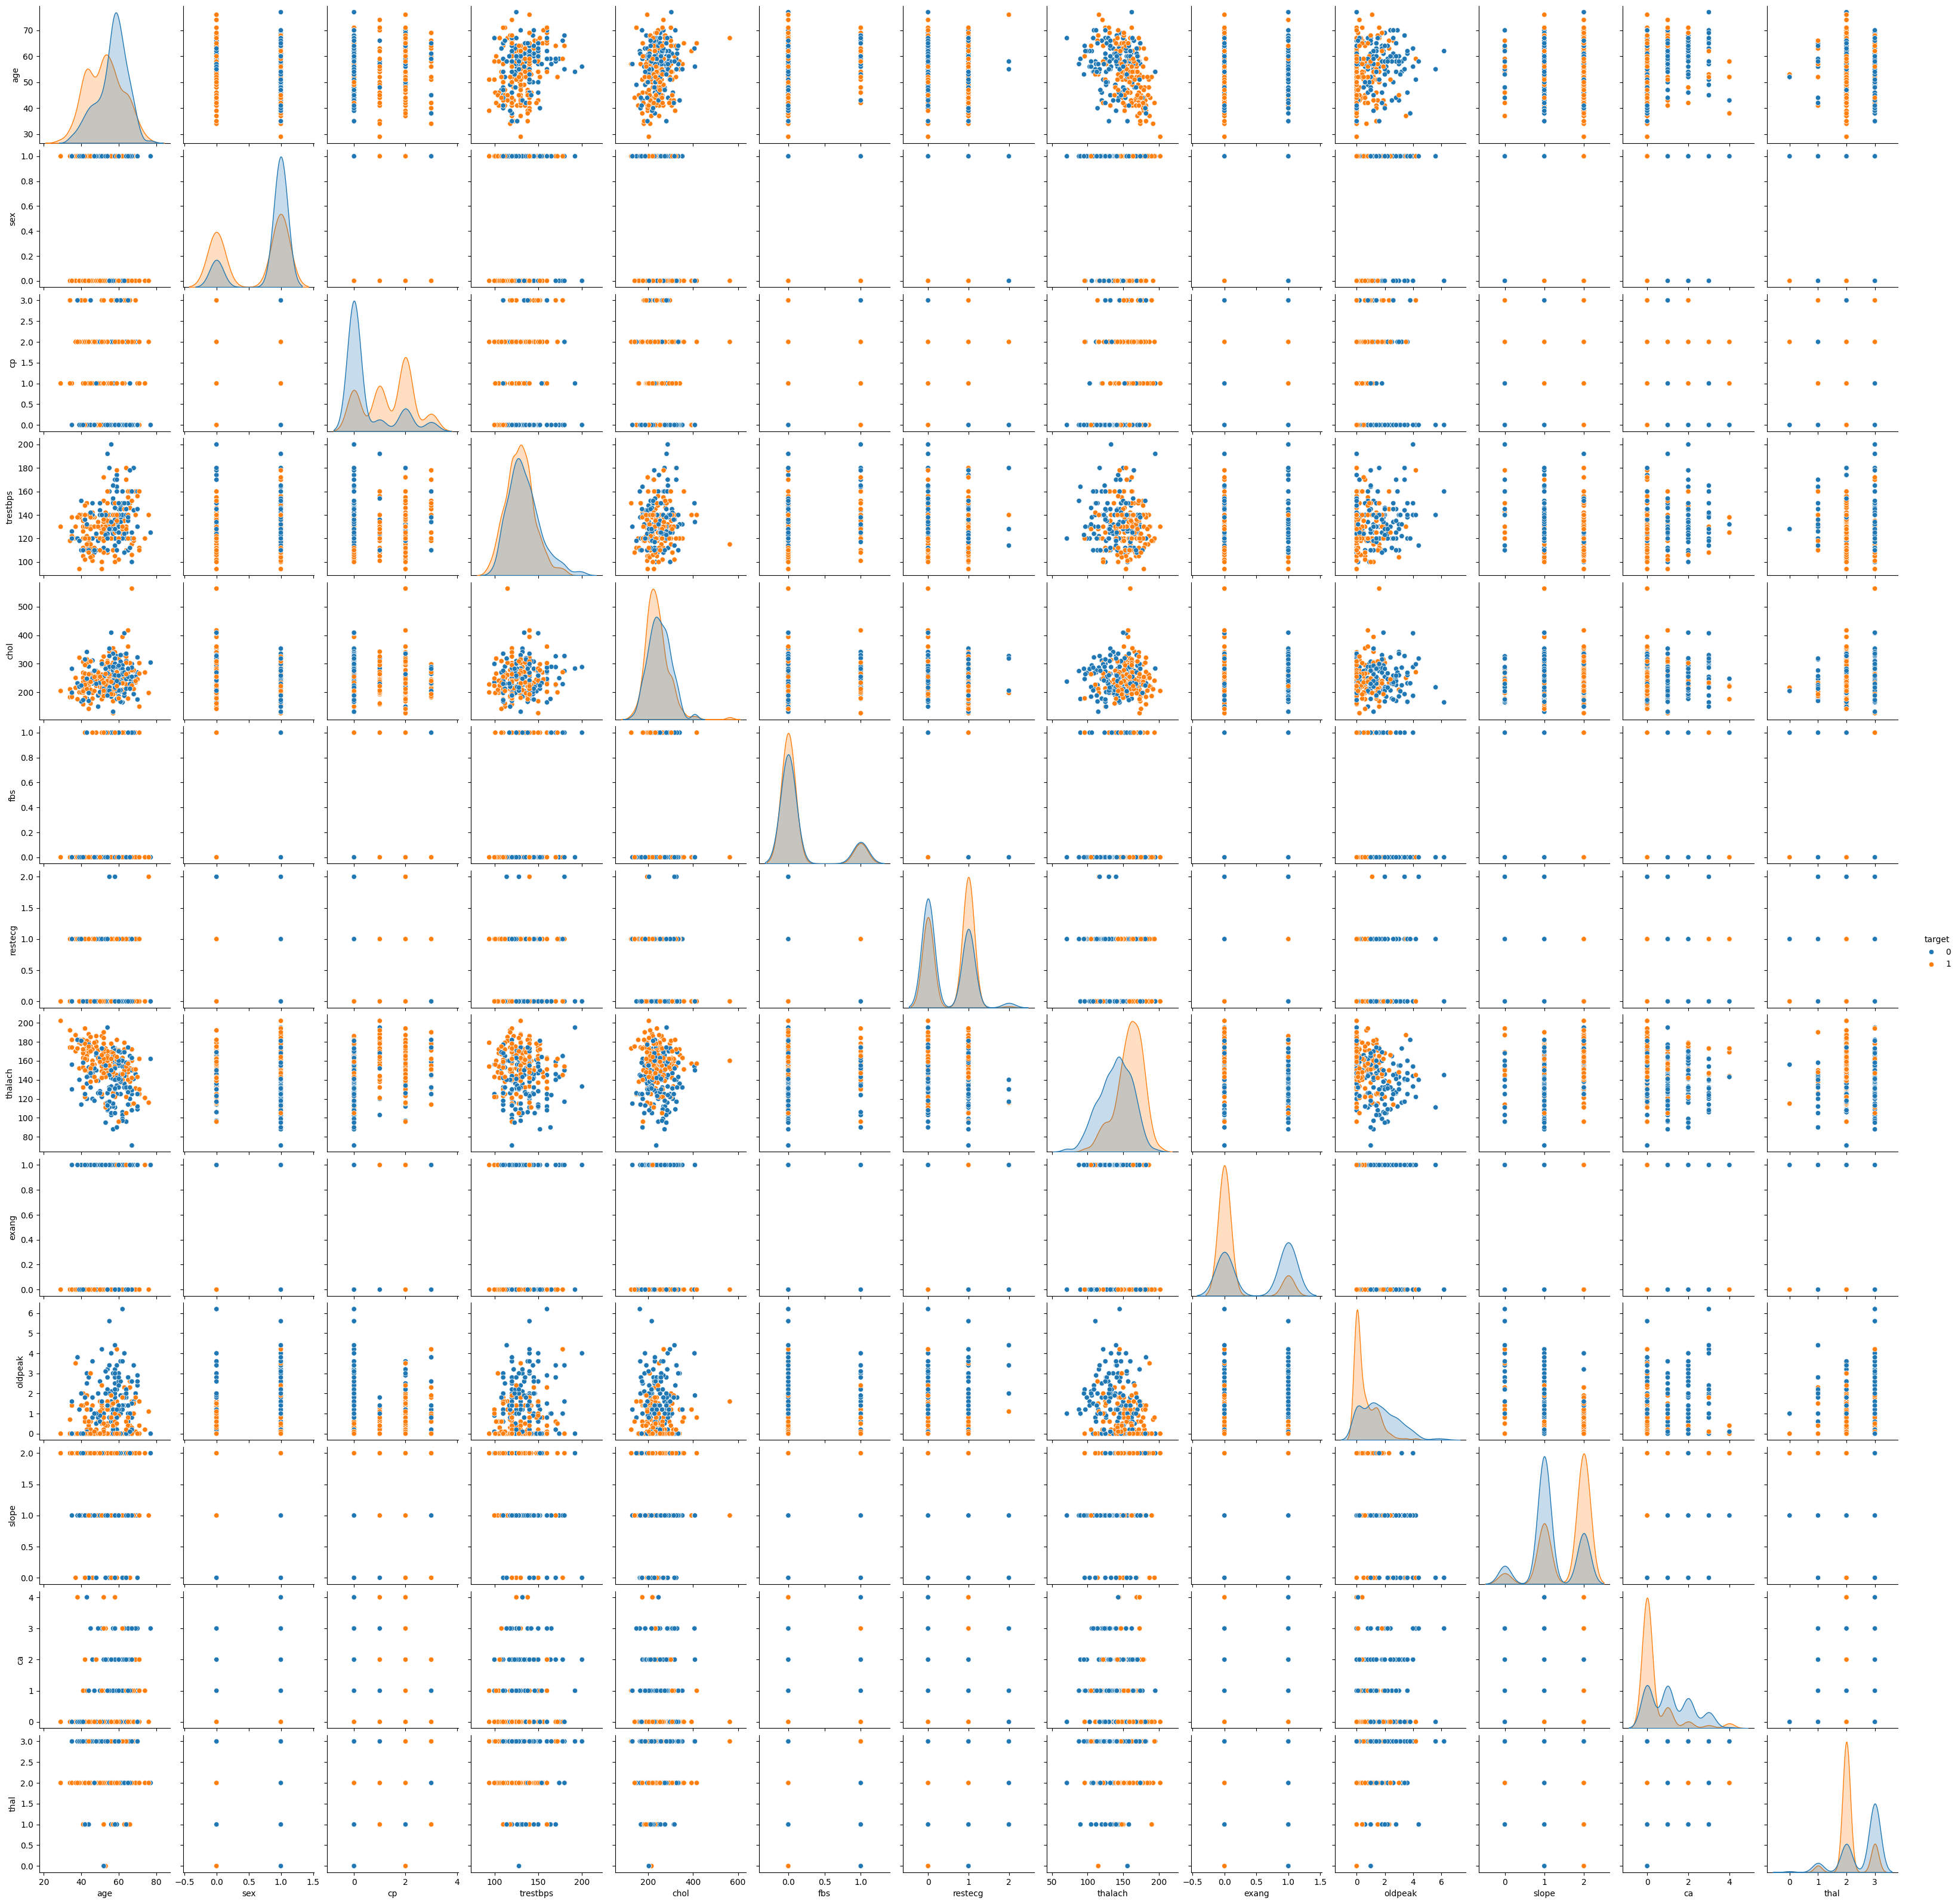

In [ ]:
# pairplot for the dataset
sns.pairplot(heart_data, hue='target')

In [ ]:
#by observing above graphs and pairplot we understand that there are many categorical columns

In [ ]:
#setting parameters for clearer image
plt.rcParams['figure.dpi'] = 300

<Axes: >

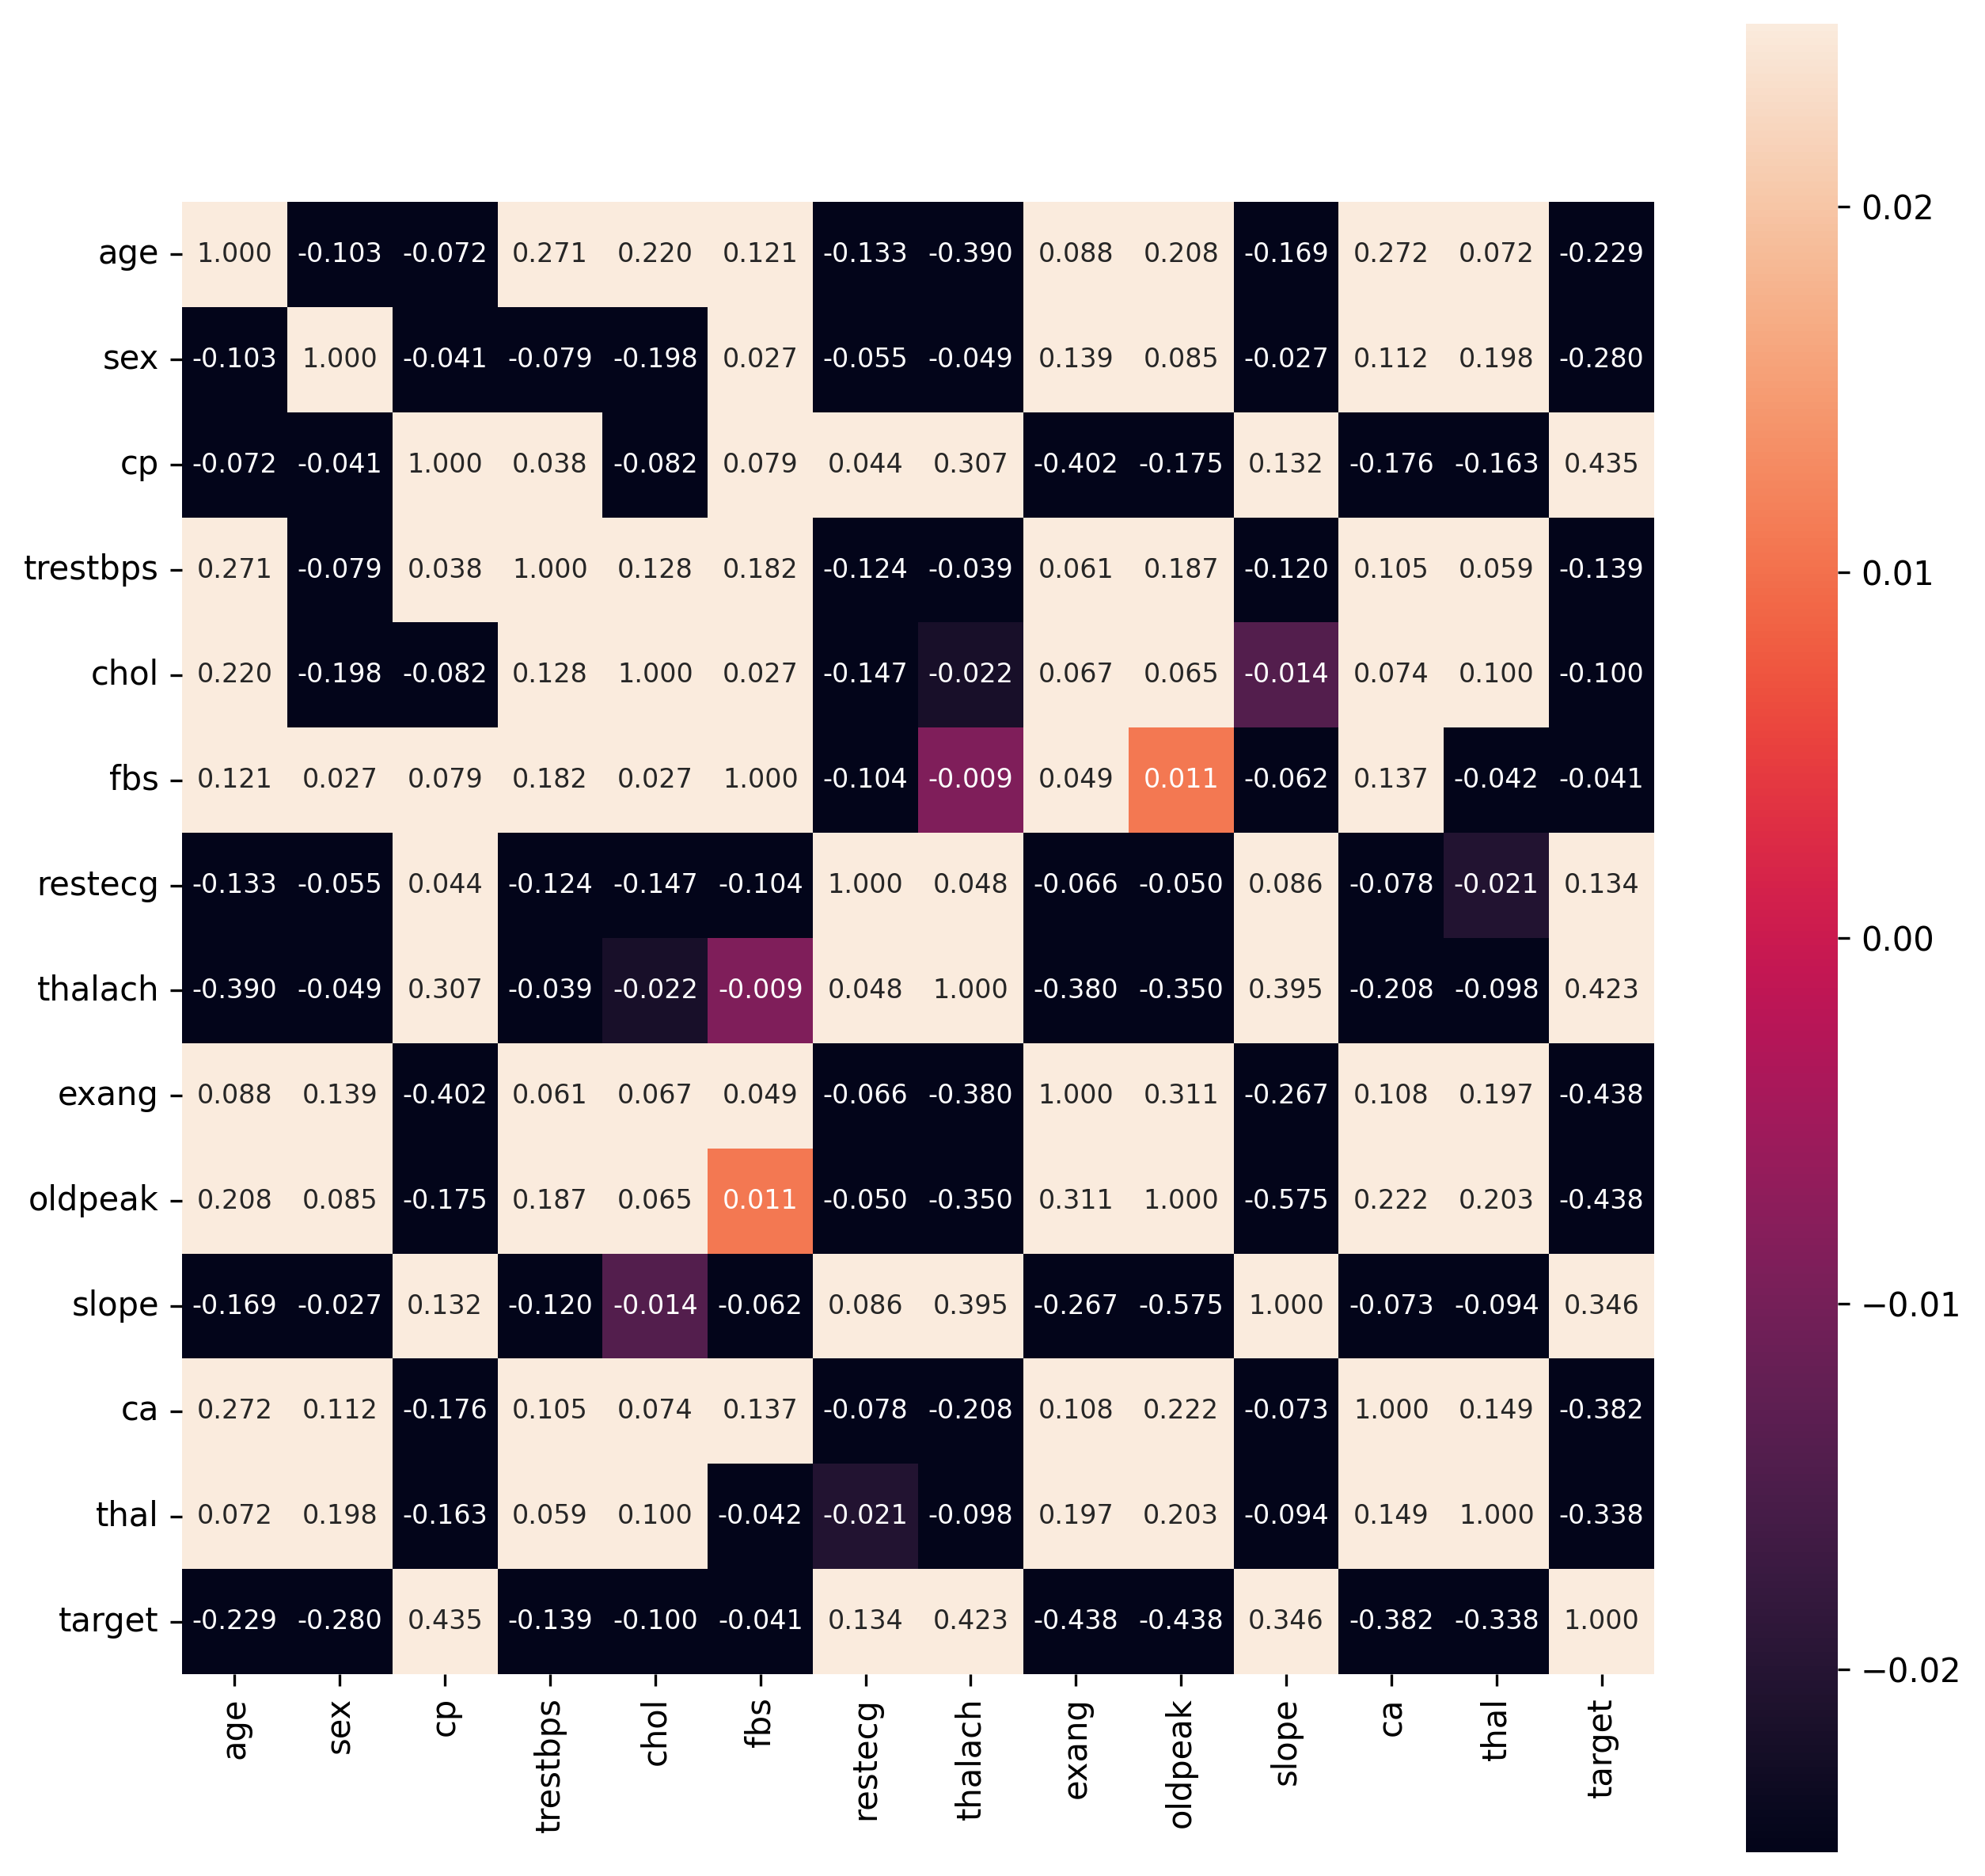

In [ ]:
# constructing a heat map to understand correlation
correlation = heart_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmin=-0.025 , vmax=0.025,cbar=True,square=True,annot=True,fmt='.3f', annot_kws={'size':8})

In [ ]:
# converting the category columns to string data type
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','ca', 'thal']
heart_data[cat_cols] = heart_data[cat_cols].astype('str')

In [ ]:
# rechecking the datatype
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


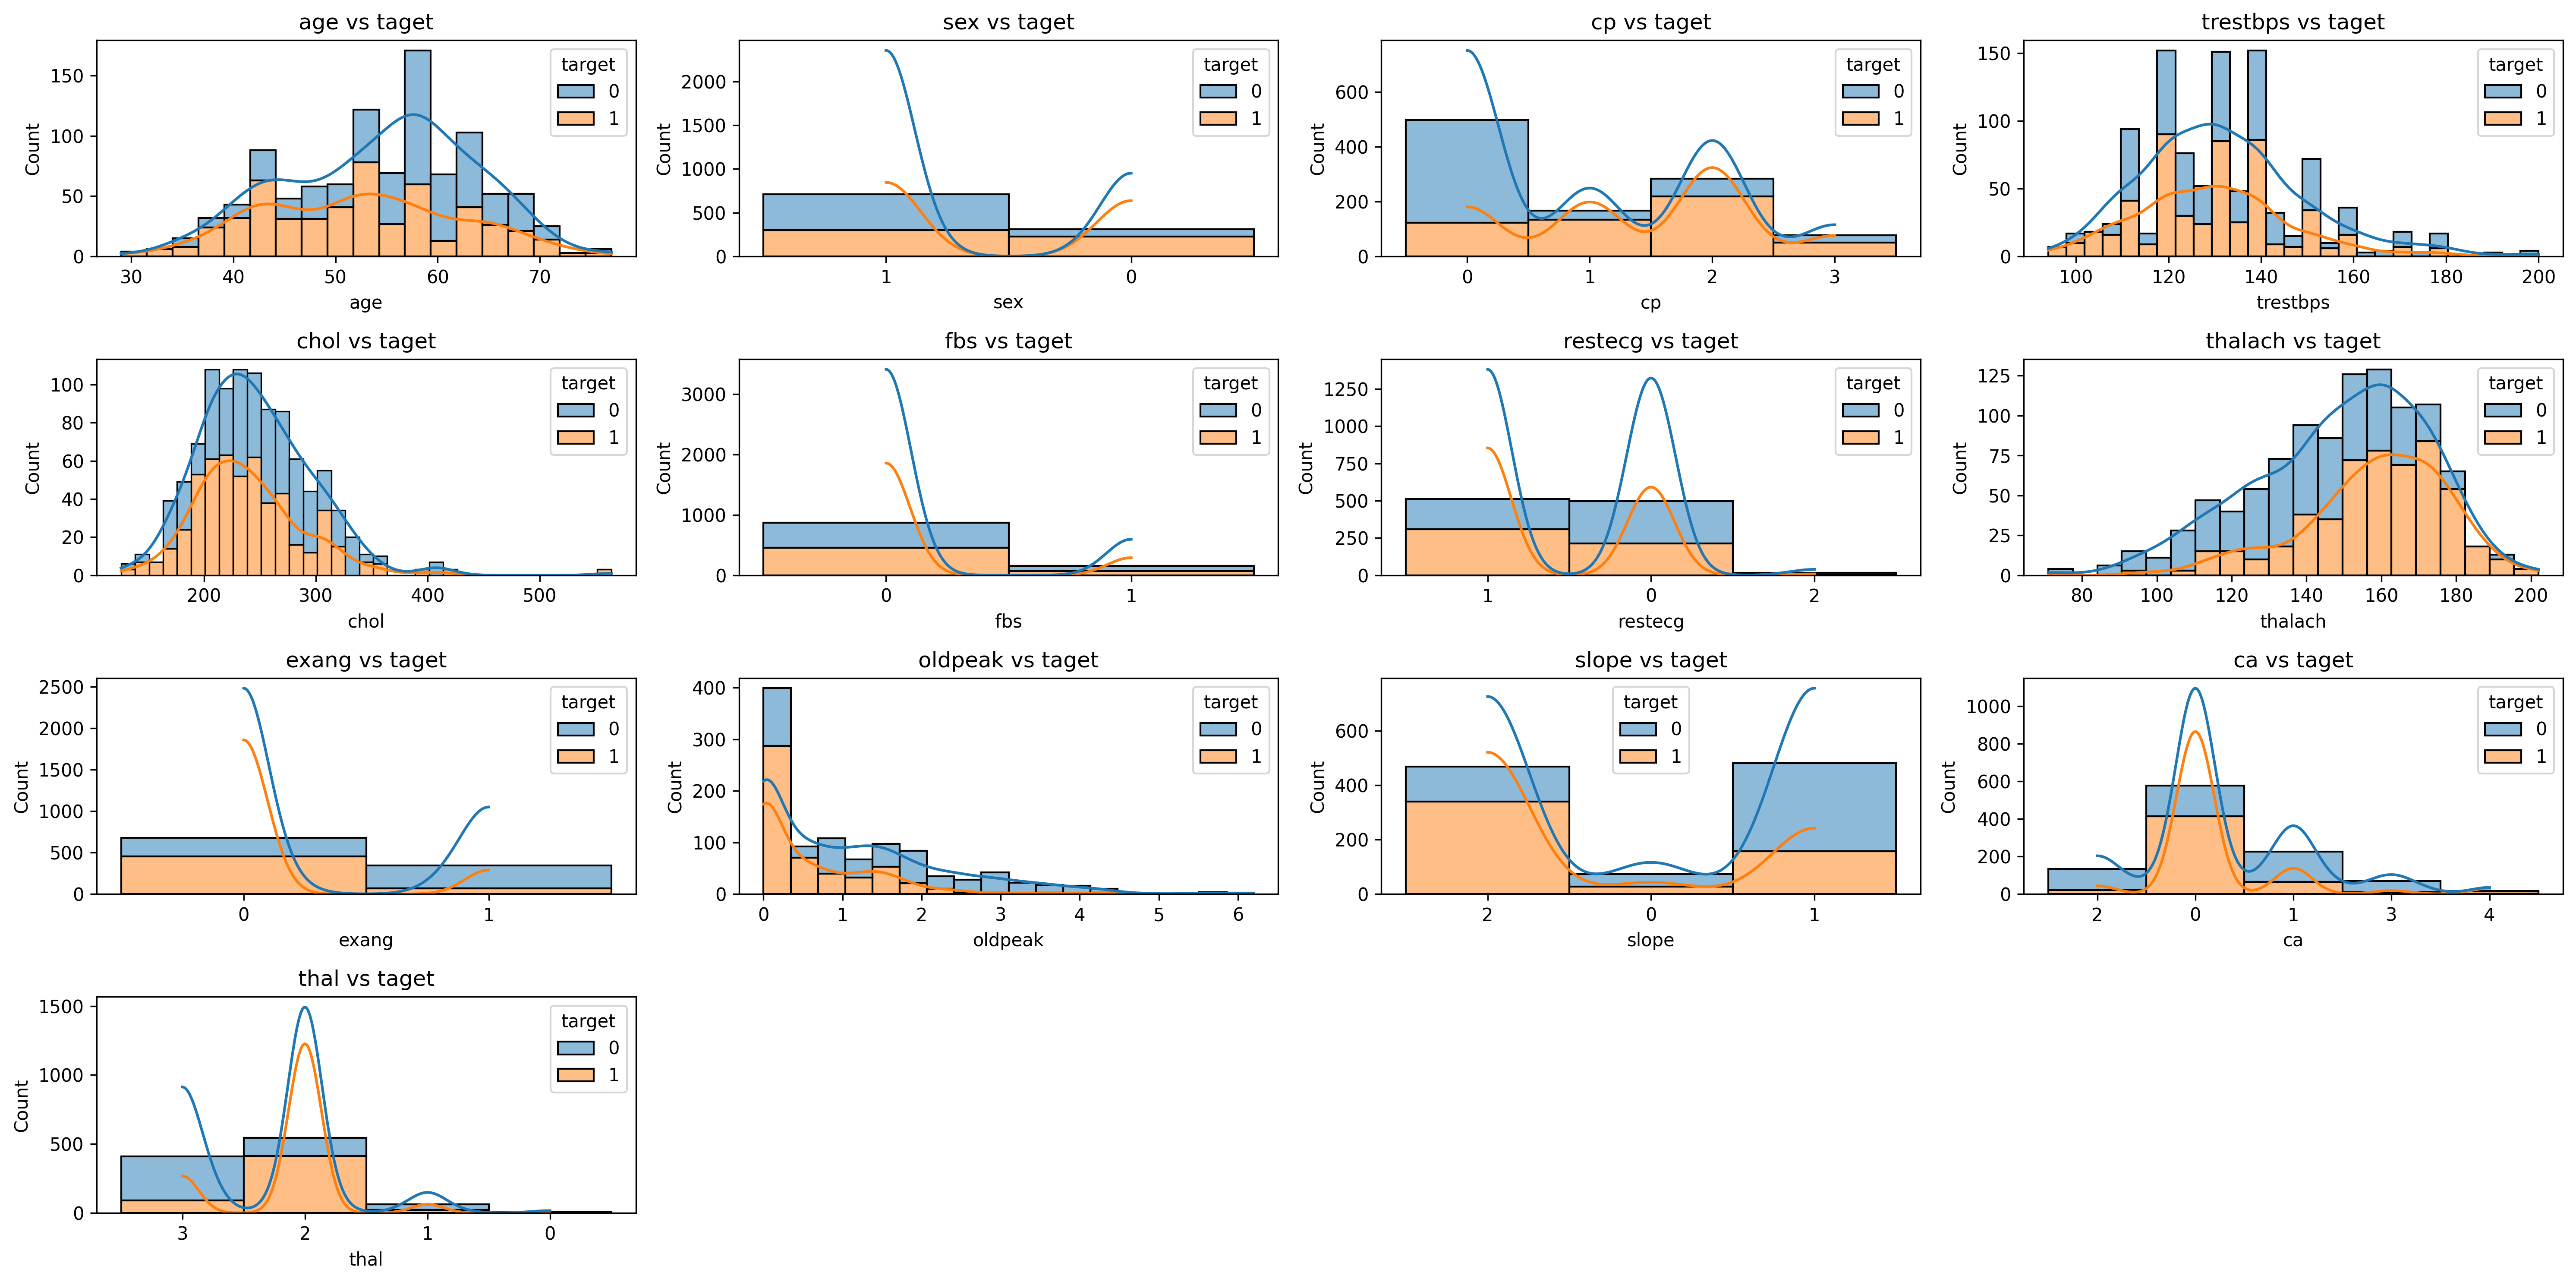

In [ ]:
# plotting the count & distribution plot through subplots
columns = heart_data.columns[:-1]
plt.figure(figsize=(20,10))
for i, col in enumerate(columns):
    plt.subplot(4,4, i+1)
    sns.histplot(x=col, data=heart_data, hue='target', multiple='stack', kde=True)
    plt.xlabel(col)
    plt.title("{} vs taget".format(col))
    plt.tight_layout()

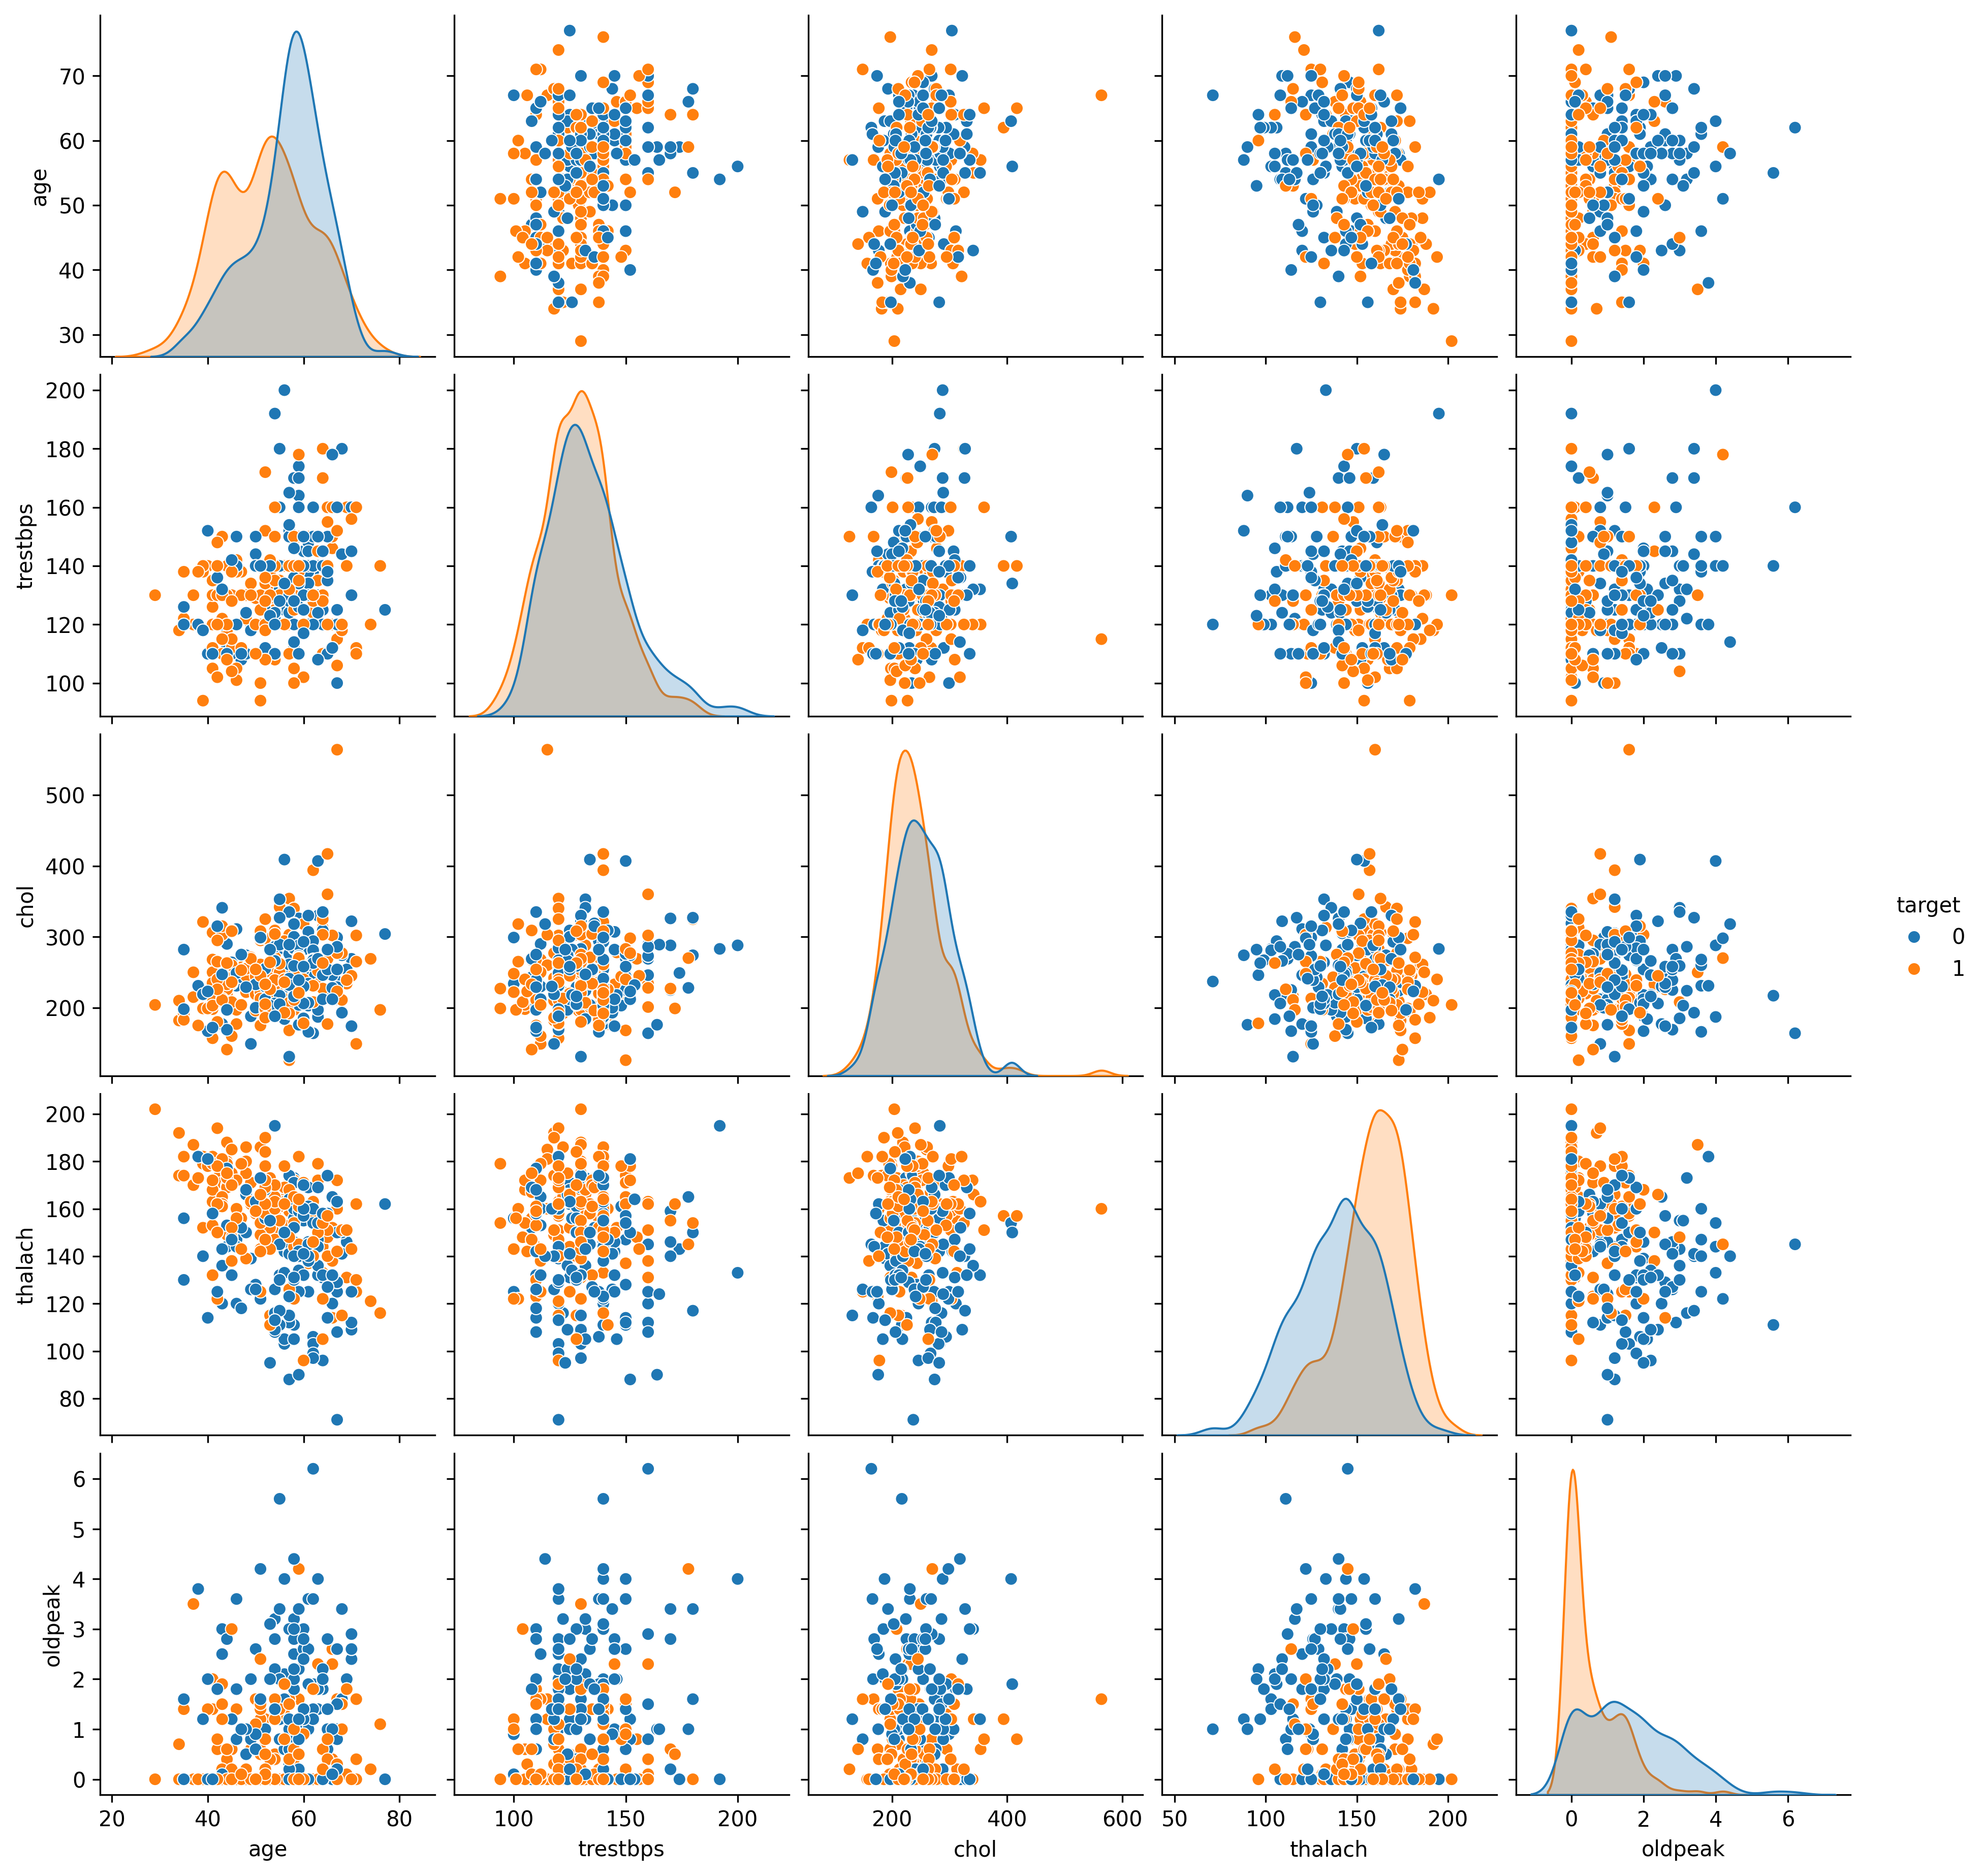

In [ ]:
#pair plot
sns.pairplot(heart_data, hue='target')

# Data Preprocessing & Splitting

Replacing the outliers with mean values according to target

In [ ]:
# checking the numnber of outliers in trestbps
heart_data[heart_data['trestbps']>180].shape

(7, 14)

In [ ]:
#taking avg for outliers with targets
avg_trestbps_non_disease = heart_data.loc[(heart_data['target'] == 0) & (heart_data['trestbps'] <= 180), 'trestbps'].mean()
avg_trestbps_disease = heart_data.loc[(heart_data['target'] == 1) & (heart_data['trestbps'] <= 180), 'trestbps'].mean()

In [ ]:
print(avg_trestbps_non_disease)
print(avg_trestbps_disease)

133.21747967479675
129.24524714828897


In [ ]:
#replaceing the outliers by mean
heart_data.loc[(heart_data['target'] == 0) & (heart_data['trestbps'] > 180), 'trestbps'] = avg_trestbps_non_disease
heart_data.loc[(heart_data['target'] == 1) & (heart_data['trestbps'] > 180), 'trestbps'] = avg_trestbps_disease

In [ ]:
# checking the numnber of outliers in trestbps
heart_data[heart_data['trestbps']>180].shape

(0, 14)

In [ ]:
# checking the numnber of outliers in chol
heart_data[heart_data['chol']>450].shape

(3, 14)

In [ ]:
#taking out indexes of outliers
print(heart_data[heart_data['chol']>450].index)

Index([158, 192, 464], dtype='int64')


In [ ]:
#dropping the outliers of chol
heart_data.drop(heart_data[heart_data['chol']>450].index, inplace=True)

In [ ]:
# checking the numnber of outliers in chol
heart_data[heart_data['chol']>450].shape

(0, 14)

In [ ]:
#taking out the number of outliers in oldpeak
heart_data[heart_data['oldpeak']>5].shape

(7, 14)

In [ ]:
#taking avg for outliers with targets
avg_oldpeak_non_disease = heart_data.loc[(heart_data['target'] == 0) & (heart_data['oldpeak'] <= 5), 'oldpeak'].mean()
avg_oldpeak_disease = heart_data.loc[(heart_data['target'] == 1) & (heart_data['oldpeak'] <= 5), 'oldpeak'].mean()

In [ ]:
print(avg_oldpeak_non_disease)
print(avg_oldpeak_disease)

1.5396341463414633
0.5640535372848948


In [ ]:
#replaceing the outliers by mean
heart_data.loc[(heart_data['target'] == 0) & (heart_data['oldpeak'] > 5), 'oldpeak'] = avg_oldpeak_non_disease
heart_data.loc[(heart_data['target'] == 1) & (heart_data['oldpeak'] > 5), 'oldpeak'] = avg_oldpeak_disease

In [ ]:
#taking out the number of outliers in oldpeak
heart_data[heart_data['oldpeak']>5].shape

(0, 14)

In [ ]:
#taking out the number of outliers in thal
heart_data[heart_data['thal']==0].shape

(0, 14)

In [ ]:
# #replacing the outliers by observing in EDA
# heart_data.loc[(heart_data['target'] == 0) & (heart_data['thal']==0), 'thal'] = 2
# heart_data.loc[(heart_data['target'] == 1) & (heart_data['thal'] ==0), 'thal'] = 3

In [ ]:
# #taking out the number of outliers in thal
# heart_data[heart_data['thal']==0].shape

(0, 14)

Splitting the Data

In [ ]:
# seperating the data and labels
X = heart_data.drop(columns = 'target', axis = 1)
y = heart_data['target']

In [ ]:
#importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

In [ ]:
# spliting the data in training & testing data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.15,random_state=42, stratify=y)

In [ ]:
print(X.shape, X_train.shape , X_test.shape)

(1022, 13) (868, 13) (154, 13)


In [ ]:
# saving the all columns of training data
all_columns = X_train.columns

One-Hot Encoding

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Sample training data
data = pd.DataFrame({
    'age': [29, 45, 34, 50],
    'gender': ['male', 'female', 'male', 'female'],
    'cholesterol': ['high', 'normal', 'high', 'low'],
    'target': [0, 1, 0, 1]
})

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# One-Hot Encode categorical columns
categorical_columns = ['gender', 'cholesterol']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_columns])

# Create a DataFrame with the encoded features
encoded_columns = encoder.get_feature_names_out(categorical_columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

# Add the remaining non-categorical columns
X_final = pd.concat([X.drop(categorical_columns, axis=1), X_encoded_df], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train your model (example with logistic regression)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(X[categorical_columns])

   gender cholesterol
0    male        high
1  female      normal
2    male        high
3  female         low


In [ ]:
import pickle

# Save the encoder
with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [ ]:
# Load the saved encoder
with open('onehot_encoder.pkl', 'rb') as file:
    loaded_encoder = pickle.load(file)

# Sample user input
user_input = {
    'age': 60,
    'gender': 'female',
    'cholesterol': 'low'
}

# Convert user input to DataFrame
user_input_df = pd.DataFrame([user_input])

# Apply one-hot encoding to user input
user_input_encoded = loaded_encoder.transform(user_input_df[categorical_columns])

# Create DataFrame for encoded user input
user_input_encoded_df = pd.DataFrame(user_input_encoded, columns=encoded_columns)

# Combine with non-categorical features
user_input_final = pd.concat([user_input_df.drop(categorical_columns, axis=1), user_input_encoded_df], axis=1)

# Predict using the trained model
prediction = model.predict(user_input_final)
print(f'Prediction: {prediction[0]}')


Prediction: 1


In [ ]:
#importing OneHotEncoder for preprocessing
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#loading the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
#fitting the categorical columns to encoder
X_train_encoded = encoder.fit_transform(X_train[cat_cols])

In [ ]:
#storing the encoding columns
encoded_columns = encoder.get_feature_names_out(cat_cols)

In [ ]:
# Create a DataFrame with the encoded features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns)

In [ ]:
# Add the remaining non-categorical columns
X_train_final_encoded = pd.concat([X_train.drop(cat_cols, axis=1).reset_index(drop=True), X_train_encoded_df], axis=1)

In [ ]:
X_train_final_encoded.head()

age  trestbps  chol  thalach  oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  ...  \
0   62     140.0   268      160      3.6    1.0    0.0   1.0   0.0   0.0  ...   
1   63     150.0   407      154      4.0    1.0    0.0   1.0   0.0   0.0  ...   
2   45     138.0   236      152      0.2    1.0    0.0   1.0   0.0   0.0  ...   
3   37     120.0   215      170      0.0    1.0    0.0   0.0   0.0   1.0  ...   
4   49     118.0   149      126      0.8    0.0    1.0   0.0   0.0   1.0  ...   

   slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0      0.0   0.0   0.0   1.0   0.0   0.0     0.0     0.0     1.0     0.0  
1      0.0   0.0   0.0   0.0   1.0   0.0     0.0     0.0     0.0     1.0  
2      0.0   1.0   0.0   0.0   0.0   0.0     0.0     0.0     1.0     0.0  
3      1.0   1.0   0.0   0.0   0.0   0.0     0.0     0.0     1.0     0.0  
4      1.0   0.0   0.0   0.0   1.0   0.0     0.0     0.0     1.0     0.0  

[5 rows x 30 columns]

In [ ]:
#checking is there any loss of data
X_train_final_encoded.isnull().sum()

age          0
trestbps     0
chol         0
thalach      0
oldpeak      0
sex_0        0
sex_1        0
cp_0         0
cp_1         0
cp_2         0
cp_3         0
fbs_0        0
fbs_1        0
restecg_0    0
restecg_1    0
restecg_2    0
exang_0      0
exang_1      0
slope_0      0
slope_1      0
slope_2      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
ca_4         0
thal_0       0
thal_1       0
thal_2       0
thal_3       0
dtype: int64

Standardizing the Data

In [ ]:
# importing the Standard Scaler to standardize the data
from sklearn.preprocessing import StandardScaler

In [ ]:
# saving the all columns of training data
training_columns = X_train_final_encoded.columns

In [ ]:
#scaling the training data
scaler = StandardScaler()
X_train_encoded = scaler.fit_transform(X_train_final_encoded)

In [ ]:
print(X_train_encoded)

[[ 0.83402563  0.52392346  0.44730416 ... -0.24723409  0.92235908
  -0.81023981]
 [ 0.94367941  1.1270226   3.27404525 ... -0.24723409 -1.08417646
   1.2342025 ]
 [-1.03008861  0.40330363 -0.20345638 ... -0.24723409  0.92235908
  -0.81023981]
 ...
 [-1.68801128 -2.2503326  -0.95589826 ... -0.24723409  0.92235908
  -0.81023981]
 [-0.48181971 -0.68227483 -0.54917292 ... -0.24723409  0.92235908
  -0.81023981]
 [ 1.27264074  1.1270226  -0.40681905 ... -0.24723409  0.92235908
  -0.81023981]]


In [ ]:
# Create a DataFrame with the encoded features
X_train_encoded_scaled = pd.DataFrame(X_train_encoded, columns=training_columns)

In [ ]:
X_train_encoded_scaled.head()

age  trestbps      chol   thalach   oldpeak     sex_0     sex_1  \
0  0.834026  0.523923  0.447304  0.473105  2.349792  1.484234 -1.484234   
1  0.943679  1.127023  3.274045  0.209977  2.714723  1.484234 -1.484234   
2 -1.030089  0.403304 -0.203456  0.122268 -0.752121  1.484234 -1.484234   
3 -1.907319 -0.682275 -0.630518  0.911652 -0.934586  1.484234 -1.484234   
4 -0.591473 -0.802895 -1.972712 -1.017954 -0.204724 -0.673748  0.673748   

       cp_0      cp_1      cp_2  ...   slope_2      ca_0      ca_1      ca_2  \
0  1.025675 -0.445976 -0.611079  ... -0.926646 -1.141222 -0.532939  2.584844   
1  1.025675 -0.445976 -0.611079  ... -0.926646 -1.141222 -0.532939 -0.386871   
2  1.025675 -0.445976 -0.611079  ... -0.926646  0.876254 -0.532939 -0.386871   
3 -0.974968 -0.445976  1.636449  ...  1.079161  0.876254 -0.532939 -0.386871   
4 -0.974968 -0.445976  1.636449  ...  1.079161 -1.141222 -0.532939 -0.386871   

       ca_3      ca_4    thal_0    thal_1    thal_2    thal_3  
0 -0.270055 -0.123307 -0.076117 -0.247234  0.922359 -0.810240  
1  3.702953 -0.123307 -0.076117 -0.247234 -1.084176  1.234203  
2 -0.270055 -0.123307 -0.076117 -0.247234  0.922359 -0.810240  
3 -0.270055 -0.123307 -0.076117 -0.247234  0.922359 -0.810240  
4  3.702953 -0.123307 -0.076117 -0.247234  0.922359 -0.810240  

[5 rows x 30 columns]

In [ ]:
#checking the number of rows and columns
X_train_encoded_scaled.shape

(868, 30)

# Model Selection

Comparing the models with default hyperparameter values using Cross Validation

In [ ]:
# importing the standard classification models from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
# all models in a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear'),
    'XGBoost': XGBClassifier()
}

In [ ]:
# importing cross validation score function to calculate the cross validation score
from sklearn.model_selection import cross_val_score

In [ ]:
# defining a function who can give you cross validation scores on given data with given set of model
def compare_models_cross_validation(models,X,y):
  for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5)
    mean_accuracy = cv_score.mean() * 100
    print(f"Model: {name}")
    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print("="*50)

In [ ]:
# calling the compare function for the models we choose
compare_models_cross_validation(models,X_train_encoded_scaled,y_train)

Model: Logistic Regression
Cross Validation accuracies for the LogisticRegression() = [0.81034483 0.89655172 0.85632184 0.83236994 0.84971098]
Acccuracy score of the  LogisticRegression() = 84.9059863132018 %
Model: KNN
Cross Validation accuracies for the KNeighborsClassifier() = [0.83908046 0.83908046 0.85632184 0.82080925 0.86705202]
Acccuracy score of the  KNeighborsClassifier() = 84.44688060593981 %
Model: Random Forest
Cross Validation accuracies for the RandomForestClassifier() = [0.98275862 0.98850575 0.98275862 0.98843931 1.        ]
Acccuracy score of the  RandomForestClassifier() = 98.84924589728257 %
Model: SVM
Cross Validation accuracies for the SVC(kernel='linear') = [0.82758621 0.89655172 0.85632184 0.80924855 0.83815029]
Acccuracy score of the  SVC(kernel='linear') = 84.55717228091156 %
Model: XGBoost
Cross Validation accuracies for the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              

Top 3:

XGBClassifier() = 98.61869643213076 %

RandomForestClassifier() = 98.84924589728257 %

LogisticRegression() = 84.9059863132018 %

# Function for Feature Selection

In [ ]:
#importing the RFE
from sklearn.feature_selection import RFE

In [ ]:
# defining a function who will give you n best features for the given model and data
def find_best_feature(n,mdl,X,y):
    model = mdl
    rfe = RFE(model, n_features_to_select=n, verbose=0)
    rfe = rfe.fit(X, y)
    selected_col = X.columns[rfe.support_]
    cv_score = cross_val_score(model,X[selected_col],y, cv=5)
    mean_accuracy = cv_score.mean() * 100
    print("Selected columns: ", list(selected_col))
    print(n, mean_accuracy)
    print("----------------------\n")
    return list(selected_col),mean_accuracy

# 1. XG Boost Classifier Model

XG Boost Classifier as the highest accuracy based on cross validation score according to its default hyperparameters XGBClassifier() = 98.61869643213076 %

In [ ]:
# loading the XG Boost Classifier model
xgb = XGBClassifier()

In [ ]:
# getting the best features of XG Boost Classifier by calling the feature selection function
best_score_xgb = 0
best_features_xgb = None
for i in range(X_train_encoded_scaled.shape[1]):
    col , score = find_best_feature(i+1,xgb,X_train_encoded_scaled,y_train)
    if best_score_xgb < score:
        best_score_xgb = score
        best_features_xgb = col
print(best_features_xgb)
print(best_score_xgb)

Selected columns:  ['thal_2']
1 76.61417845990299
----------------------

Selected columns:  ['cp_0', 'thal_2']
2 74.65151817155005
----------------------

Selected columns:  ['cp_0', 'ca_0', 'thal_2']
3 84.44621619825924
----------------------

Selected columns:  ['sex_0', 'cp_0', 'ca_0', 'thal_2']
4 84.10138861205235
----------------------

Selected columns:  ['sex_0', 'cp_0', 'ca_0', 'thal_1', 'thal_2']
5 82.48953557903128
----------------------

Selected columns:  ['sex_0', 'cp_0', 'cp_1', 'ca_0', 'thal_1', 'thal_2']
6 82.60248488472527
----------------------

Selected columns:  ['sex_0', 'cp_0', 'cp_1', 'slope_1', 'ca_0', 'thal_1', 'thal_2']
7 85.59763470865724
----------------------

Selected columns:  ['oldpeak', 'sex_0', 'cp_0', 'cp_1', 'slope_1', 'ca_0', 'thal_1', 'thal_2']
8 93.4336588930968
----------------------

Selected columns:  ['oldpeak', 'sex_0', 'cp_0', 'cp_1', 'slope_1', 'ca_0', 'ca_1', 'thal_1', 'thal_2']
9 94.4681416517175
----------------------

Selected columns:

Best Features : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'exang_0', 'slope_1', 'ca_0', 'ca_1', 'ca_3', 'thal_1', 'thal_2', 'thal_3']

In [ ]:
# using a diffferent df to store
X_train_best_features_xgb = X_train_encoded_scaled[best_features_xgb]

In [ ]:
# getting the cross val score of xgb with its best features
cv_score_xgb = cross_val_score(xgb, X_train_best_features_xgb, y_train, cv=5)
print(cv_score_xgb)
print(cv_score_xgb.mean())

[0.97701149 0.98850575 0.98275862 0.98843931 0.99421965]
0.9861869643213076


In [ ]:
# fitting the default model with its best features
xgb.fit(X_train_best_features_xgb,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Test Data Preprocessing

In [ ]:
#fitting the categorical columns to encoder
X_test_encoded = encoder.transform(X_test[cat_cols])

In [ ]:
# Create a DataFrame with the encoded features
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns)

In [ ]:
# Add the remaining non-categorical columns
X_test_final_encoded = pd.concat([X_test.drop(cat_cols, axis=1).reset_index(drop=True), X_test_encoded_df], axis=1)

In [ ]:
X_test_final_encoded.head()

age  trestbps  chol  thalach  oldpeak  sex_0  sex_1  cp_0  cp_1  cp_2  ...  \
0   41     130.0   204      172      1.4    1.0    0.0   0.0   1.0   0.0  ...   
1   58     100.0   234      156      0.1    0.0    1.0   1.0   0.0   0.0  ...   
2   63     140.0   187      144      4.0    0.0    1.0   1.0   0.0   0.0  ...   
3   48     124.0   255      175      0.0    0.0    1.0   0.0   0.0   1.0  ...   
4   54     124.0   266      109      2.2    0.0    1.0   1.0   0.0   0.0  ...   

   slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0      1.0   1.0   0.0   0.0   0.0   0.0     0.0     0.0     1.0     0.0  
1      1.0   0.0   1.0   0.0   0.0   0.0     0.0     0.0     0.0     1.0  
2      1.0   0.0   0.0   1.0   0.0   0.0     0.0     0.0     0.0     1.0  
3      1.0   0.0   0.0   1.0   0.0   0.0     0.0     0.0     1.0     0.0  
4      0.0   0.0   1.0   0.0   0.0   0.0     0.0     0.0     0.0     1.0  

[5 rows x 30 columns]

In [ ]:
#scaling the training data
X_test_scaled = scaler.transform(X_test_final_encoded)

In [ ]:
print(X_test_scaled)

[[-1.46870372 -0.07917569 -0.85421692 ... -0.24723409  0.92235908
  -0.81023981]
 [ 0.39541051 -1.88847312 -0.24412892 ... -0.24723409 -1.08417646
   1.2342025 ]
 [ 0.94367941  0.52392346 -1.19993346 ... -0.24723409 -1.08417646
   1.2342025 ]
 ...
 [-0.37216593 -2.2503326  -0.38648279 ... -0.24723409 -1.08417646
   1.2342025 ]
 [ 0.50506429  2.8157002   0.48797669 ... -0.24723409 -1.08417646
   1.2342025 ]
 [-1.90731883 -0.07917569  0.08125135 ... -0.24723409  0.92235908
  -0.81023981]]


In [ ]:
X_test_encoded_scaled = pd.DataFrame(X_test_scaled, columns=training_columns)

In [ ]:
X_test_encoded_scaled.head()

age  trestbps      chol   thalach   oldpeak     sex_0     sex_1  \
0 -1.468704 -0.079176 -0.854217  0.999362  0.342672  1.484234 -1.484234   
1  0.395411 -1.888473 -0.244129  0.297687 -0.843353 -0.673748  0.673748   
2  0.943679  0.523923 -1.199933 -0.228570  2.714723 -0.673748  0.673748   
3 -0.701127 -0.441035  0.182933  1.130926 -0.934586 -0.673748  0.673748   
4 -0.043205 -0.441035  0.406632 -1.763484  1.072534 -0.673748  0.673748   

       cp_0      cp_1      cp_2  ...   slope_2      ca_0      ca_1      ca_2  \
0 -0.974968  2.242271 -0.611079  ...  1.079161  0.876254 -0.532939 -0.386871   
1  1.025675 -0.445976 -0.611079  ...  1.079161 -1.141222  1.876388 -0.386871   
2  1.025675 -0.445976 -0.611079  ...  1.079161 -1.141222 -0.532939  2.584844   
3 -0.974968 -0.445976  1.636449  ...  1.079161 -1.141222 -0.532939  2.584844   
4  1.025675 -0.445976 -0.611079  ... -0.926646 -1.141222  1.876388 -0.386871   

       ca_3      ca_4    thal_0    thal_1    thal_2    thal_3  
0 -0.270055 -0.123307 -0.076117 -0.247234  0.922359 -0.810240  
1 -0.270055 -0.123307 -0.076117 -0.247234 -1.084176  1.234203  
2 -0.270055 -0.123307 -0.076117 -0.247234 -1.084176  1.234203  
3 -0.270055 -0.123307 -0.076117 -0.247234  0.922359 -0.810240  
4 -0.270055 -0.123307 -0.076117 -0.247234 -1.084176  1.234203  

[5 rows x 30 columns]

In [ ]:
#checking the number of rows and columns
X_test_encoded_scaled.shape

(154, 30)

In [ ]:
# taking only best features of xgb to test data
X_test_best_features_xgb = X_test_encoded_scaled[best_features_xgb]

In [ ]:
best_features_xgb

['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'sex_0',
 'cp_0',
 'cp_1',
 'cp_2',
 'cp_3',
 'exang_0',
 'slope_1',
 'ca_0',
 'ca_1',
 'ca_3',
 'thal_1',
 'thal_2',
 'thal_3']

In [ ]:
# predicting the labels on test data
y_predict_xgb = xgb.predict(X_test_best_features_xgb)

In [ ]:
# importing the classification report for evaluation
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_predict_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [ ]:
# importing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print(confusion_matrix(y_test, y_predict_xgb))

[[75  0]
 [ 0 79]]


#Hyperparameter Tuning : XG Boost Classifier

In [ ]:
# importing gridsearchcv to check the best hyperparameters
from sklearn.model_selection import GridSearchCV

In [ ]:
# parameters for XG Boost Classifier
params_xgb = {
    'n_estimators': [300, 350, 400],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1,2,3,4,5],
    }

In [ ]:
# fitting the data and model to grid search cv
grid_xgb = GridSearchCV(estimator=xgb, param_grid=params_xgb, cv=5, n_jobs=-1)
grid_xgb.fit(X_train_best_features_xgb,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [300, 350, 400]})

In [ ]:
# getting the best hyperparameters
print(grid_xgb.best_estimator_, grid_xgb.best_params_, grid_xgb.best_score_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 350} 0.9861869643213076


In [ ]:
# testing grid_xgb model on test data
y_predict_grid_xgb = grid_xgb.predict(X_test_best_features_xgb)
print(classification_report(y_test, y_predict_grid_xgb))
print(confusion_matrix(y_test, y_predict_grid_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

[[75  0]
 [ 0 79]]


Best Parameters : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 350}

# Final Model : XG Boost Classifier

In [ ]:
# loading the model with best hyper parameter
model1 = XGBClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 350)

In [ ]:
# fitting the training data with best features of xgb
model1.fit(X_train_best_features_xgb,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#Model Evaluation : XG Boost Classifier

In [ ]:
# predicting the test data
y_predict_model1 = model1.predict(X_test_best_features_xgb)

In [ ]:
# getting classification report
print(classification_report(y_test, y_predict_model1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [ ]:
# loading the accuracy score for evaluation
from sklearn.metrics import accuracy_score

In [ ]:
#model1 accuracy on training data
y_train_predict_model1 = model1.predict(X_train_best_features_xgb)
train_data_accuracy_model1 = accuracy_score(y_train_predict_model1, y_train)
print('Accuracy on training data: ',train_data_accuracy_model1 )

Accuracy on training data:  1.0


In [ ]:
# classification report on training data of model1
print(classification_report(y_train, y_train_predict_model1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       444

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



In [ ]:
#setting parameters for clearer image
plt.rcParams['figure.dpi'] = 100

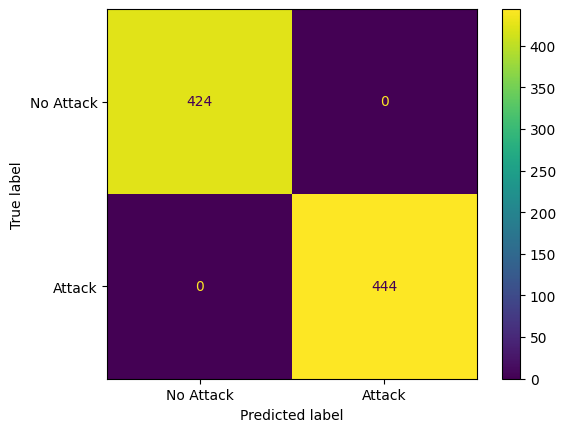

In [ ]:
# confusion matrix of training data
fig, ax = plt.subplots()
cm = confusion_matrix(y_train, y_train_predict_model1)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Attack', 'Attack'])
disp.plot(ax=ax)
plt.show()

In [ ]:
#model1 accuracy on test data
y_test_predict_model1 = model1.predict(X_test_best_features_xgb)
test_data_accuracy_model1 = accuracy_score(y_test_predict_model1, y_test)
print('Accuracy on test data: ',test_data_accuracy_model1 )

Accuracy on test data:  1.0


In [ ]:
#classification report on test data of model1
print(classification_report(y_test, y_test_predict_model1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



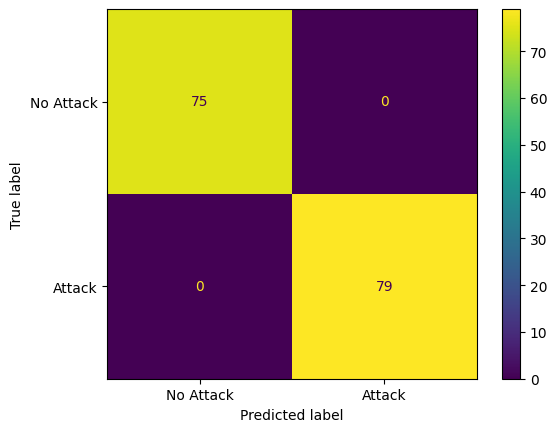

In [ ]:
# confusion matrix of test data
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_test_predict_model1)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Attack', 'Attack'])
disp.plot(ax=ax)
plt.show()

#Another Data

In [ ]:
#evlauting on another dataset
another_data = pd.read_csv('/content/Project 9 Heart Disease Data.csv')

In [ ]:
y = another_data['target']

In [ ]:
another_data.drop(columns=['target'],inplace=True)

In [ ]:
another_data[cat_cols] = another_data[cat_cols].astype('str')

In [ ]:
#fitting the categorical columns to encoder
another_data_encoded = encoder.transform(another_data[cat_cols])

In [ ]:
# Create a DataFrame with the encoded features
another_data_encoded_df = pd.DataFrame(another_data_encoded, columns=encoded_columns)

In [ ]:
# Add the remaining non-categorical columns
another_data_final_encoded = pd.concat([another_data.drop(cat_cols, axis=1).reset_index(drop=True), another_data_encoded_df], axis=1)

In [ ]:
#scaling the training data
another_data_scaled = scaler.transform(another_data_final_encoded)

In [ ]:
another_data_scaled = pd.DataFrame(another_data_scaled, columns=training_columns)

In [ ]:
another_data_scaled.head()

age  trestbps      chol   thalach   oldpeak     sex_0     sex_1  \
0  0.943679  0.825473 -0.264465  0.034558  1.163767 -0.673748  0.673748   
1 -1.907319 -0.079176  0.081251  1.657182  2.258559 -0.673748  0.673748   
2 -1.468704 -0.079176 -0.854217  0.999362  0.342672  1.484234 -1.484234   
3  0.176103 -0.682275 -0.203456  1.262490 -0.204724 -0.673748  0.673748   
4  0.285757 -0.682275  2.196223  0.604669 -0.387190  1.484234 -1.484234   

       cp_0      cp_1      cp_2  ...   slope_2      ca_0      ca_1      ca_2  \
0 -0.974968 -0.445976 -0.611079  ... -0.926646  0.876254 -0.532939 -0.386871   
1 -0.974968 -0.445976  1.636449  ... -0.926646  0.876254 -0.532939 -0.386871   
2 -0.974968  2.242271 -0.611079  ...  1.079161  0.876254 -0.532939 -0.386871   
3 -0.974968  2.242271 -0.611079  ...  1.079161  0.876254 -0.532939 -0.386871   
4  1.025675 -0.445976 -0.611079  ...  1.079161  0.876254 -0.532939 -0.386871   

       ca_3      ca_4    thal_0    thal_1    thal_2   thal_3  
0 -0.270055 -0.123307 -0.076117  4.044750 -1.084176 -0.81024  
1 -0.270055 -0.123307 -0.076117 -0.247234  0.922359 -0.81024  
2 -0.270055 -0.123307 -0.076117 -0.247234  0.922359 -0.81024  
3 -0.270055 -0.123307 -0.076117 -0.247234  0.922359 -0.81024  
4 -0.270055 -0.123307 -0.076117 -0.247234  0.922359 -0.81024  

[5 rows x 30 columns]

In [ ]:
# taking only best features of xgb to test data
another_data_best_features_xgb = another_data_scaled[best_features_xgb]

In [ ]:
# predicting the labels on test data
y_predict_xgb_another_data = xgb.predict(another_data_best_features_xgb)

In [ ]:
print(classification_report(y, y_predict_xgb_another_data))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       165

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303



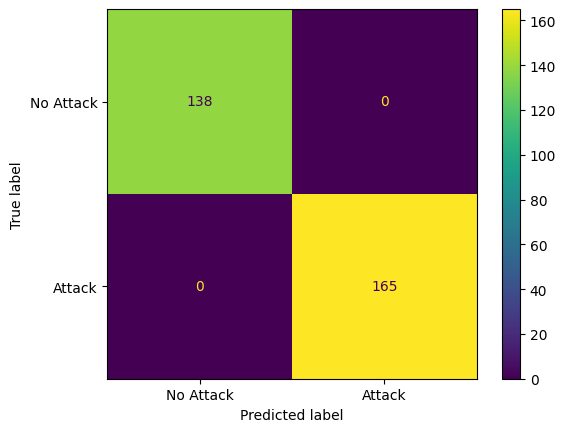

In [ ]:
# confusion matrix of training data
fig, ax = plt.subplots()
cm = confusion_matrix(y, y_predict_xgb_another_data)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Attack', 'Attack'])
disp.plot(ax=ax)
plt.show()

# 2. Random Forest Classifier Model

Random Forest Classifier has the 2nd highest accuracy based on cross validation score according to its default hyperparameters RandomForestClassifier() = 98.50375390339512 %

In [ ]:
# loading the Random Forest Classifier model
rfc = RandomForestClassifier()

In [ ]:
# getting the best features of RFC by calling the feature selection function
best_score_rfc = 0
best_features_rfc = None
for i in range(X_train_encoded_scaled.shape[1]):
    col , score = find_best_feature(i+1,rfc,X_train_encoded_scaled,y_train)
    if best_score_rfc < score:
        best_score_rfc = score
        best_features_rfc = col
print(best_features_rfc)
print(best_score_rfc)

Selected columns:  ['thalach']
1 72.693508736961
----------------------

Selected columns:  ['chol', 'thalach']
2 96.89190087037407
----------------------

Selected columns:  ['age', 'thalach', 'oldpeak']
3 97.92837685203641
----------------------

Selected columns:  ['chol', 'thalach', 'oldpeak', 'thal_2']
4 98.38681815161785
----------------------

Selected columns:  ['age', 'chol', 'thalach', 'oldpeak', 'thal_2']
5 99.42462294864129
----------------------

Selected columns:  ['age', 'chol', 'thalach', 'oldpeak', 'cp_0', 'thal_2']
6 99.42329413328018
----------------------

Selected columns:  ['age', 'chol', 'thalach', 'oldpeak', 'cp_0', 'ca_0', 'thal_2']
7 99.53890106969637
----------------------

Selected columns:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cp_0', 'ca_0', 'thal_2']
8 99.07913095475382
----------------------

Selected columns:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cp_0', 'ca_0', 'thal_2', 'thal_3']
9 98.84791708192147
----------------------

Se

Best Features : ['age', 'chol', 'thalach', 'oldpeak', 'cp_0', 'ca_0', 'thal_2']

In [ ]:
# using a diffferent df to store
X_train_best_features_rfc = X_train_encoded_scaled[best_features_rfc]

In [ ]:
# getting the cross val score of rfc with its best features
cv_score_rfc = cross_val_score(rfc, X_train_best_features_rfc, y_train, cv=5)
print(cv_score_rfc)
print(cv_score_rfc.mean())

[0.99425287 0.98850575 1.         0.97687861 1.        ]
0.9919274466812837


In [ ]:
# fitting the default model with its best features
rfc.fit(X_train_best_features_rfc,y_train)

RandomForestClassifier()

In [ ]:
# taking only best features of rfc to test data
X_test_best_features_rfc = X_test_encoded_scaled[best_features_rfc]

In [ ]:
best_features_rfc

['age', 'chol', 'thalach', 'oldpeak', 'cp_0', 'ca_0', 'thal_2']

In [ ]:
# predicting the labels on test data
y_predict_rfc = rfc.predict(X_test_best_features_rfc)

In [ ]:
# the classification report for evaluation
print(classification_report(y_test, y_predict_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [ ]:
# the confusion matrix
print(confusion_matrix(y_test, y_predict_rfc))

[[75  0]
 [ 0 79]]


# Hyperparameter Tuning : Random Forest Classifier

In [ ]:
#setting the hyperparameters
params_rfc = {
    'n_estimators': [100, 200,300, 400],
    'max_depth': [10, 20, 30,40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

In [ ]:
# fitting the data and model to grid search cv
grid_rfc = GridSearchCV(estimator=rfc, param_grid=params_rfc, cv=5, n_jobs=-1)
grid_rfc.fit(X_train_best_features_rfc,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]})

In [ ]:
# getting the best hyperparameters
print(grid_rfc.best_estimator_, grid_rfc.best_params_, grid_rfc.best_score_)

RandomForestClassifier(max_depth=30, n_estimators=200) {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 0.9942395854096073


In [ ]:
# testing grid_rfc model on test data
y_predict_grid_rfc = grid_rfc.predict(X_test_best_features_rfc)
print(classification_report(y_test, y_predict_grid_rfc))
print(confusion_matrix(y_test, y_predict_grid_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

[[75  0]
 [ 0 79]]


Best Parameters : {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Final Model : Random Forest Classifier

In [ ]:
# loading the model with best hyper parameter
model2 = RandomForestClassifier(max_depth=30, n_estimators=200)

In [ ]:
# fitting the training data with best features of rfc
model2.fit(X_train_best_features_rfc,y_train)

RandomForestClassifier(max_depth=30, n_estimators=200)

# Model Evaluation :Random Forest Classifier

In [ ]:
# predicting the test data
y_predict_model2 = model2.predict(X_test_best_features_rfc)

In [ ]:
# getting classification report
print(classification_report(y_test, y_predict_model2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [ ]:
#model3 accuracy on training data
y_train_predict_model2 = model2.predict(X_train_best_features_rfc)
train_data_accuracy_model2 = accuracy_score(y_train_predict_model2, y_train)
print('Accuracy on training data: ',train_data_accuracy_model2 )

Accuracy on training data:  1.0


In [ ]:
# classification report on training data of model2
print(classification_report(y_train, y_train_predict_model2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       444

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



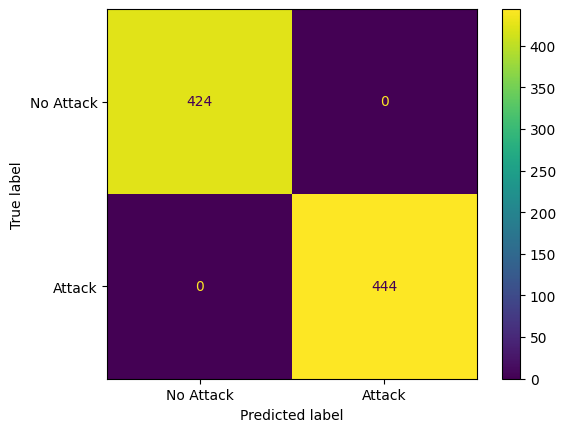

In [ ]:
# confusion matrix of training data
fig, ax = plt.subplots()
cm = confusion_matrix(y_train, y_train_predict_model2)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Attack', 'Attack'])
disp.plot(ax=ax)
plt.show()

In [ ]:
#model2 accuracy on test data
y_test_predict_model2 = model2.predict(X_test_best_features_rfc)
test_data_accuracy_model2 = accuracy_score(y_test_predict_model2, y_test)
print('Accuracy on test data: ',test_data_accuracy_model2 )

Accuracy on test data:  1.0


In [ ]:
#classification report on test data of model2
print(classification_report(y_test, y_test_predict_model2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



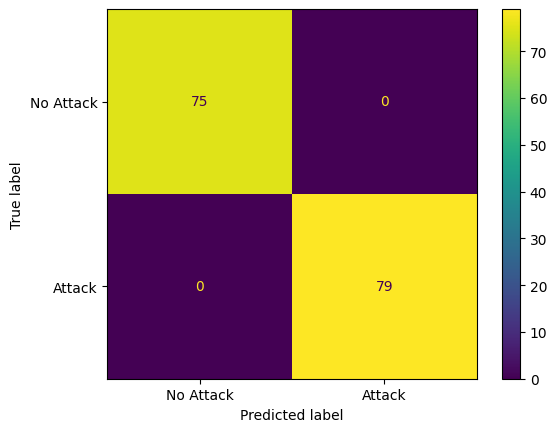

In [ ]:
# confusion matrix of test data
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_test_predict_model2)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Attack', 'Attack'])
disp.plot(ax=ax)
plt.show()

# 3. Logistic Regression Model

Logistic Regression as the 3rd highest accuracy based on cross validation score according to its default hyperparameters LogisticRegression() = 84.9059863132018 %

In [ ]:
# loading the Logistic Regression model
lr = LogisticRegression()

In [ ]:
# getting the best features of Logistic Regression by calling the feature selection function
best_score_lr = 0
best_features_lr = None
for i in range(X_train_encoded_scaled.shape[1]):
    col , score = find_best_feature(i+1,lr,X_train_encoded_scaled,y_train)
    if best_score_lr < score:
        best_score_lr = score
        best_features_lr = col
print(best_features_lr)
print(best_score_lr)

Selected columns:  ['thal_2']
1 76.61417845990299
----------------------

Selected columns:  ['ca_0', 'thal_2']
2 75.92053684140588
----------------------

Selected columns:  ['cp_0', 'ca_0', 'thal_2']
3 84.44621619825924
----------------------

Selected columns:  ['cp_0', 'slope_2', 'ca_0', 'thal_2']
4 84.10005979669124
----------------------

Selected columns:  ['sex_0', 'cp_0', 'slope_2', 'ca_0', 'thal_2']
5 83.41306225499967
----------------------

Selected columns:  ['chol', 'sex_0', 'cp_0', 'slope_2', 'ca_0', 'thal_2']
6 84.9099727592851
----------------------

Selected columns:  ['chol', 'oldpeak', 'sex_0', 'cp_0', 'slope_2', 'ca_0', 'thal_2']
7 85.14185103979803
----------------------

Selected columns:  ['chol', 'oldpeak', 'sex_0', 'cp_0', 'slope_2', 'ca_0', 'ca_4', 'thal_2']
8 85.60294997010166
----------------------

Selected columns:  ['chol', 'thalach', 'oldpeak', 'sex_0', 'cp_0', 'slope_2', 'ca_0', 'ca_4', 'thal_2']
9 85.14251544747857
----------------------

Selected col

Best Features : ['trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1', 'cp_0', 'cp_2', 'cp_3', 'slope_2', 'ca_0', 'ca_4', 'thal_1', 'thal_2']

In [ ]:
# using a diffferent df to store
X_train_best_features_lr = X_train_encoded_scaled[best_features_lr]

In [ ]:
# getting the cross val score of lr with its best features
cv_score_lr = cross_val_score(lr, X_train_best_features_lr, y_train, cv=5)
print(cv_score_lr)
print(cv_score_lr.mean())

[0.82758621 0.89655172 0.83908046 0.87283237 0.89595376]
0.8664009035944457


In [ ]:
# fitting the default model with its best features
lr.fit(X_train_best_features_lr,y_train)

LogisticRegression()

In [ ]:
# taking only best features of lr to test data
X_test_best_features_lr = X_test_encoded_scaled[best_features_lr]

In [ ]:
best_features_lr

['trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'sex_0',
 'sex_1',
 'cp_0',
 'cp_2',
 'cp_3',
 'slope_2',
 'ca_0',
 'ca_4',
 'thal_1',
 'thal_2']

In [ ]:
# predicting the labels on test data
y_predict_lr = lr.predict(X_test_best_features_lr)

In [ ]:
print(classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        75
           1       0.86      0.87      0.87        79

    accuracy                           0.86       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.86      0.86      0.86       154



In [ ]:
print(confusion_matrix(y_test, y_predict_lr))

[[64 11]
 [10 69]]


# Hyperparameter Tuning : Logistic Regression Model

In [ ]:
#setting the hyperparameters
params_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }

In [ ]:
# fitting the data and model to grid search cv
grid_lr = GridSearchCV(estimator=lr, param_grid=params_lr, cv=5, n_jobs=-1)
grid_lr.fit(X_train_best_features_lr,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
325 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
# getting the best hyperparameters
print(grid_lr.best_estimator_, grid_lr.best_params_, grid_lr.best_score_)

LogisticRegression(C=0.01, solver='liblinear') {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'} 0.8687130423227692


In [ ]:
# testing grid_lr model on test data
y_predict_grid_lr = grid_lr.predict(X_test_best_features_lr)
print(classification_report(y_test, y_predict_grid_lr))
print(confusion_matrix(y_test, y_predict_grid_lr))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        75
           1       0.89      0.89      0.89        79

    accuracy                           0.88       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.88      0.88      0.88       154

[[66  9]
 [ 9 70]]


Best Parameters : {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

# Final Model : Logistic Regression Model

In [ ]:
# loading the model with best hyper parameter
model3 = LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
# fitting the training data with best features of lr
model3.fit(X_train_best_features_lr,y_train)

LogisticRegression(C=0.01, solver='liblinear')

# Model Evaluation : Logistic Regression Model

In [ ]:
# predicting the test data
y_predict_model3 = model3.predict(X_test_best_features_lr)

In [ ]:
# getting classification report
print(classification_report(y_test, y_predict_model3))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        75
           1       0.89      0.89      0.89        79

    accuracy                           0.88       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.88      0.88      0.88       154



In [ ]:
#model1 accuracy on training data
y_train_predict_model3 = model3.predict(X_train_best_features_lr)
train_data_accuracy_model3 = accuracy_score(y_train_predict_model3, y_train)
print('Accuracy on training data: ',train_data_accuracy_model3 )

Accuracy on training data:  0.8778801843317973


In [ ]:
# classification report on training data of model3
print(classification_report(y_train, y_train_predict_model3))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       424
           1       0.87      0.90      0.88       444

    accuracy                           0.88       868
   macro avg       0.88      0.88      0.88       868
weighted avg       0.88      0.88      0.88       868



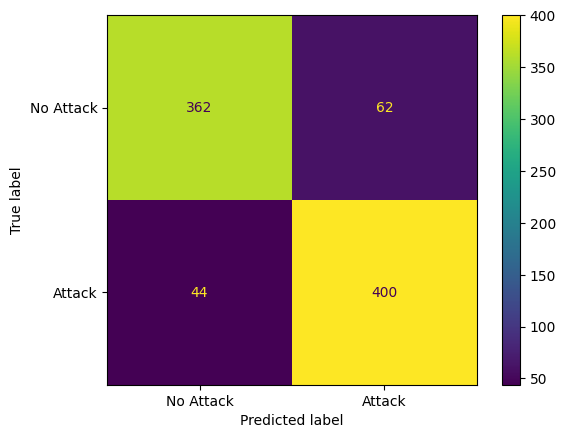

In [ ]:
# confusion matrix of training data
fig, ax = plt.subplots()
cm = confusion_matrix(y_train, y_train_predict_model3)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Attack', 'Attack'])
disp.plot(ax=ax)
plt.show()

In [ ]:
#model3 accuracy on test data
y_test_predict_model3 = model3.predict(X_test_best_features_lr)
test_data_accuracy_model3 = accuracy_score(y_test_predict_model3,y_test)
print('Accuracy on test data: ',test_data_accuracy_model3 )

Accuracy on test data:  0.8831168831168831


In [ ]:
#classification report on test data of model3
print(classification_report(y_test,y_test_predict_model3))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        75
           1       0.89      0.89      0.89        79

    accuracy                           0.88       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.88      0.88      0.88       154



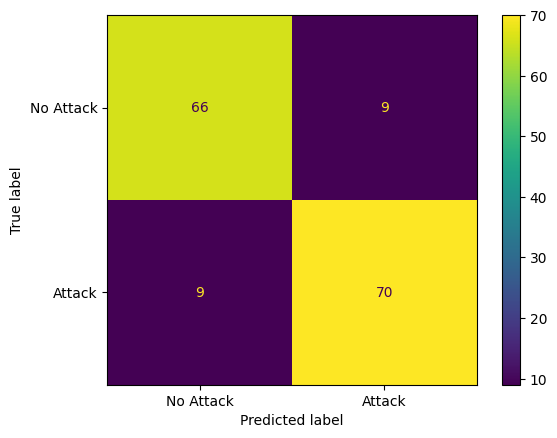

In [ ]:
# confusion matrix of testing data
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_test_predict_model3)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Attack', 'Attack'])
disp.plot(ax=ax)
plt.show()

# Conclusion

Model 1 : XG Boost Classifier Model

Training Data Accuracy : 100%

Testing Data Accuracy : 100%

Model 2 :Random Forest Classifier

Training Data Accuracy : 100%

Testing Data Accuracy : 100%

Model 3 : Logistic Regression

Training Data Accuracy : 87.788%

Testing Data Accuracy : 88.311%

# Predictive System (not done yet)

Buliding a Predictive System for here

In [ ]:
#taking input data
input_data = (58,1,0,100,234,0,1,156,0,0.1,2,1,3)

#loading columns
columns = all_columns

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=columns)

# Convert the categorical columns to string type
df[cat_cols] = df[cat_cols].astype('str')

# Encode the categorical columns
input_data_encoded = encoder.transform(df[cat_cols])

# Create a DataFrame with the encoded features
input_data_encoded_df = pd.DataFrame(input_data_encoded, columns=encoded_columns)

# Add the remaining non-categorical columns
input_data_final_encoded = pd.concat([df.drop(cat_cols, axis=1).reset_index(drop=True), input_data_encoded_df], axis=1)

# Standardize the input data
input_data_scaled = scaler.transform(input_data_final_encoded)

# Create a DataFrame with the standardized features
input_data_df = pd.DataFrame(input_data_scaled, columns=training_columns)

#loading best features
df_best_features_xgb = input_data_df[best_features_xgb]
df_best_features_rfc = input_data_df[best_features_rfc]
df_best_features_lr = input_data_df[best_features_lr]

#predictions
prediction1 = model1.predict(df_best_features_xgb)
prediction2 = model2.predict(df_best_features_rfc)
prediction3 = model3.predict(df_best_features_lr)

# Print the predictions
print(prediction1)
if(prediction1[0]==0):
  print('The Person does not have any Heart Disease')
else:
  print('The Person have any Heart Disease')
print(prediction2)
if(prediction2[0]==0):
  print('The Person does not have any Heart Disease')
else:
  print('The Person have any Heart Disease')
print(prediction3)
if(prediction3[0]==0):
  print('The Person does not have any Heart Disease')
else:
  print('The Person have any Heart Disease')

[0]
The Person does not have any Heart Disease
[0]
The Person does not have any Heart Disease
[0]
The Person does not have any Heart Disease


In [ ]:
import json
import pickle
with open('columns.pkl', 'wb') as file:
    pickle.dump(all_columns, file)
with open('cat_columns.pkl', 'wb') as file:
    pickle.dump(cat_cols, file)
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
with open('encoded_columns.pkl', 'wb') as file:
    pickle.dump(encoded_columns, file)
with open('training_columns.pkl', 'wb') as file:
    pickle.dump(training_columns, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('best_features_xgb.json', 'w') as file:
    json.dump(best_features_xgb, file)
with open('best_features_rfc.json', 'w') as file:
    json.dump(best_features_rfc, file)
with open('best_features_lr.json', 'w') as file:
    json.dump(best_features_lr, file)
with open('heart_disease_trained_xgb_model.sav', 'wb') as f:
    pickle.dump(model1, f)
with open('heart_disease_trained_rfc_model.sav', 'wb') as f:
    pickle.dump(model2, f)
with open('heart_disease_trained_lr_model.sav', 'wb') as f:
    pickle.dump(model3, f)

In [ ]:
#loading. the saved model
with open('columns.pkl', 'rb') as f:
    all_columns_sm = pickle.load(f)
with open('cat_columns.pkl', 'rb') as f:
    cat_columns_sm = pickle.load(f)
with open('encoder.pkl', 'rb') as f:
    encoder_sm = pickle.load(f)
with open('encoded_columns.pkl', 'rb') as f:
    encoded_columns_sm = pickle.load(f)
with open('training_columns.pkl', 'rb') as f:
    training_columns_sm = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler_sm = pickle.load(f)
with open('best_features_xgb.json', 'r') as file:
    best_features_xgb = json.load(file)
with open('best_features_rfc.json', 'r') as file:
    best_features_rfc = json.load(file)
with open('best_features_lr.json', 'r') as file:
    best_features_lr = json.load(file)
with open('heart_disease_trained_xgb_model.sav', 'rb') as f:
    loaded_model_xgb = pickle.load(f)
with open('heart_disease_trained_rfc_model.sav', 'rb') as f:
    loaded_model_rfc = pickle.load(f)
with open('heart_disease_trained_lr_model.sav', 'rb') as f:
    loaded_model_lr = pickle.load(f)

In [ ]:
#taking input data
input_data = (58,1,0,100,234,0,1,156,0,0.1,2,1,3)

#loading columns
columns = all_columns_sm

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=columns)

# Convert the categorical columns to string type
df[cat_columns_sm] = df[cat_columns_sm].astype('str')

# Encode the categorical columns
input_data_encoded = encoder_sm.transform(df[cat_columns_sm])

# Create a DataFrame with the encoded features
input_data_encoded_df = pd.DataFrame(input_data_encoded, columns=encoded_columns_sm)

# Add the remaining non-categorical columns
input_data_final_encoded = pd.concat([df.drop(cat_columns_sm, axis=1).reset_index(drop=True), input_data_encoded_df], axis=1)

# Standardize the input data
input_data_scaled = scaler_sm.transform(input_data_final_encoded)

# Create a DataFrame with the standardized features
input_data_df = pd.DataFrame(input_data_scaled, columns=training_columns_sm)

#loading best features
df_best_features_xgb = input_data_df[best_features_xgb]
df_best_features_rfc = input_data_df[best_features_rfc]
df_best_features_lr = input_data_df[best_features_lr]

#predictions
prediction1 = loaded_model_xgb.predict(df_best_features_xgb)
prediction2 = loaded_model_rfc.predict(df_best_features_rfc)
prediction3 = loaded_model_lr.predict(df_best_features_lr)

# Print the predictions
print(prediction1)
if(prediction1[0]==0):
  print('The Person does not have any Heart Disease')
else:
  print('The Person have any Heart Disease')
print(prediction2)
if(prediction2[0]==0):
  print('The Person does not have any Heart Disease')
else:
  print('The Person have any Heart Disease')
print(prediction3)
if(prediction3[0]==0):
  print('The Person does not have any Heart Disease')
else:
  print('The Person have any Heart Disease')

[0]
The Person does not have any Heart Disease
[0]
The Person does not have any Heart Disease
[0]
The Person does not have any Heart Disease
